# Insurance Claim Fraud Detection
Project Description
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.
In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 
In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

Independent Variables
1.	months_as_customer: Number of months of patronage
2.	age: the length of time a customer has lived or a thing has existed
3.	policy_number: It is a unique id given to the customer, to track the subscription status and other details of customer
4.	policy_bind_date:date which document that is given to customer after we accept your proposal for insurance
5.	policy_state: This identifies who is the insured, what risks or property are covered, the policy limits, and the policy period
6.	policy_csl: is basically Combined Single Limit
7.	policy_deductable: the amount of money that a customer is responsible for paying toward an insured loss
8.	policy_annual_premium: This means the amount of Regular Premium payable by the Policyholder in a Policy Year
9.	umbrella_limit: This means extra insurance that provides protection beyond existing limits and coverages of other policies
10.	insured_zip: It is the zip code where the insurance was made
11.	insured_sex: This refres to either of the two main categories (male and female) into which customer are divided on the basis of their reproductive functions
12.	insured_education_level: This refers to the Level of education of the customer
13.	insured_occupation: This refers Occupation of the customer
14.	insured_hobbies: This refers to an activity done regularly by customer in his/her leisure time for pleasure.
15.	insured_relationship: This whether customer is: single; or. married; or. in a de facto relationship (that is, living together but not married); or. in a civil partnership
16.	capital-gains: This refers to profit accrued due to insurance premium
17.	capital-loss: This refers to the losses incurred due to insurance claims
18.	incident_date: This refers to the date which claims where made by customers
19.	incident_type: This refers to the type of claim/vehicle damage made by customer
20.	collision_type: This refers to the area of damage on the vehicle
21.	incident_severity: This refers to the extent/level of damage
22.	authorities_contacted: This refers to the government agencies that were contacted after damage
23.	incident_state: This refers to the state at which the accident happened
24.	incident_city: This refers to the city at which the accident happened
25.	1ncident_location: This refers to the location at which the accident happened
26.	incident_hour_of_the_day: The period of the day which accident took place
27.	number_of_vehicles_involved: This refers to number of vehicles involved the accident
28.	property_damage: This refers to whether property was damaged or not
29.	bodily_injuries: This refers to injuries sustained
30.	witnesses: This refers to the number of witnesses involved
31.	police_report_available: This refers to whether the report on damage was documented or not
32.	total_claim_amount: This refers to the financial implications involved in claims
33.	injury_claim: This refers to physical injuries sustained
34.	property_claim: This refers to property damages during incident
35.	vehicle_claim: This refers to property damages during incident
36.	auto_make: This refers to the make of the vehicle
37.	auto_model: This refers to the model of the vehicle


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy as stats
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [3]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import time

In [4]:

df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [5]:
df['_c39'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: _c39, dtype: float64

In [6]:
df.drop('_c39',axis=1,inplace=True)

In [7]:
df['policy_csl'].value_counts()

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

In [8]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [9]:
df.shape

(1000, 39)

In [10]:
df.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,3,?,5060,460,920,3680,Mercedes,E400,2007,N


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

<AxesSubplot:xlabel='months_as_customer', ylabel='Density'>

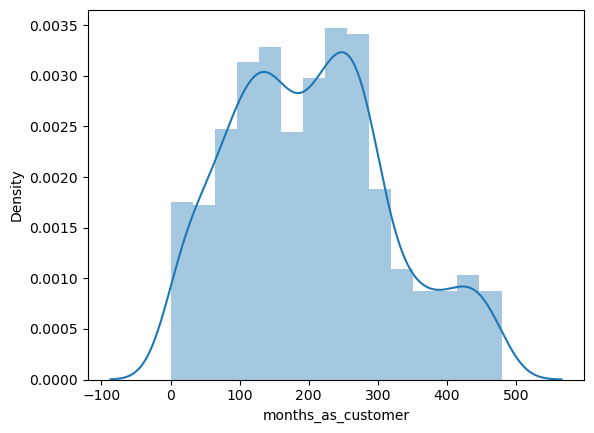

In [12]:
sns.distplot(df['months_as_customer'])

<AxesSubplot:xlabel='age', ylabel='Density'>

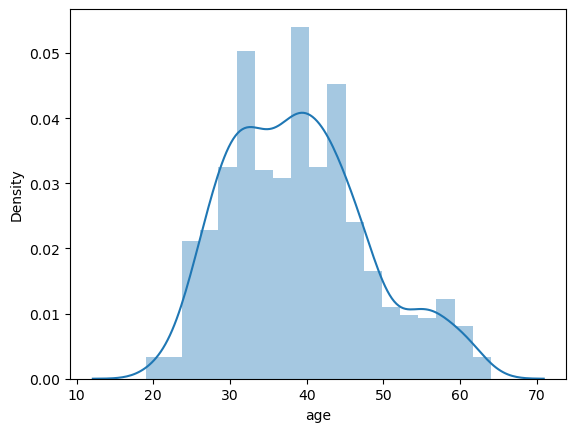

In [13]:
sns.distplot(df['age'])

In [14]:
df1=df.drop('policy_number',axis=1)

In [15]:
df1['policy_bind_date'].head(4)

0    17-10-2014
1    27-06-2006
2    06-09-2000
3    25-05-1990
Name: policy_bind_date, dtype: object

In [16]:
df1['policy_bind_year'] = pd.DatetimeIndex(df1['policy_bind_date']).year
df1['policy_bind_year'].head()

0    2014
1    2006
2    2000
3    1990
4    2014
Name: policy_bind_year, dtype: int64

In [17]:
df1.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_year
0,328,48,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,2014
1,228,42,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,2006
2,134,29,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,2000
3,256,41,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,1990
4,228,44,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,2014


In [18]:
df1.drop('policy_bind_date',axis=1,inplace=True)

In [19]:
df1.shape

(1000, 38)

In [20]:
df1['policy_state'].head()

0    OH
1    IN
2    OH
3    IL
4    IL
Name: policy_state, dtype: object

In [21]:
df1['policy_state'].isnull().sum()

0

<AxesSubplot:xlabel='policy_state', ylabel='count'>

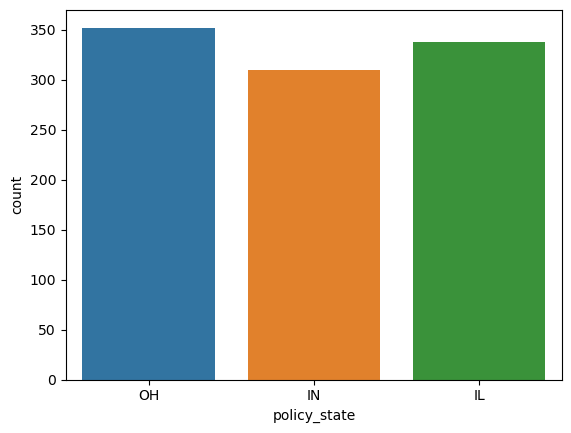

In [22]:
sns.countplot(df1['policy_state'])

In [23]:
#creating the dictionary to know which label represents what
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(df1['policy_state'])
label_policy_state=dict(zip(range(len(le.classes_)),le.classes_)) 

In [24]:
df1['policy_state']=le.fit_transform(df1['policy_state'])

In [25]:
df1['policy_csl'].value_counts()

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

<AxesSubplot:xlabel='policy_csl', ylabel='count'>

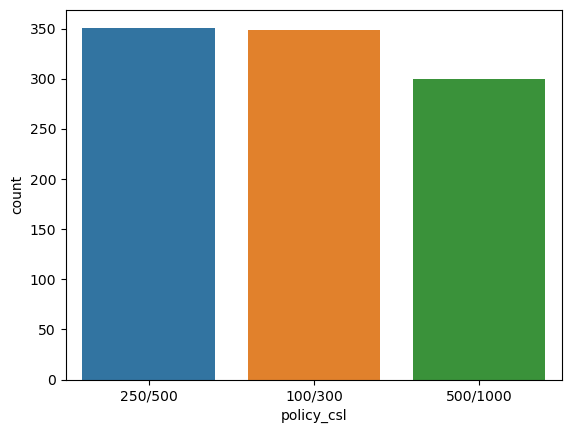

In [26]:
sns.countplot(df1['policy_csl'])

In [27]:
le.fit(df1['policy_csl'])
label_policy_csl=dict(zip(range(len(le.classes_)),le.classes_)) 

In [28]:
df1['policy_csl']=le.fit_transform(df1['policy_csl'])

In [29]:
df1['policy_csl'].value_counts()

1    351
0    349
2    300
Name: policy_csl, dtype: int64

In [30]:
df1['policy_deductable'].value_counts()

1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64

<AxesSubplot:xlabel='policy_deductable', ylabel='count'>

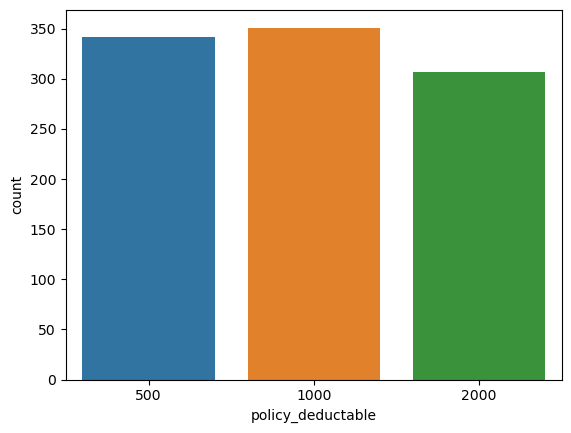

In [31]:
sns.countplot(df1['policy_deductable'])

In [32]:
le.fit(df1['policy_deductable'])
label_policy_deductable=dict(zip(range(len(le.classes_)),le.classes_)) 

In [33]:
df1['policy_deductable']=le.fit_transform(df1['policy_deductable'])

<AxesSubplot:xlabel='policy_annual_premium', ylabel='Density'>

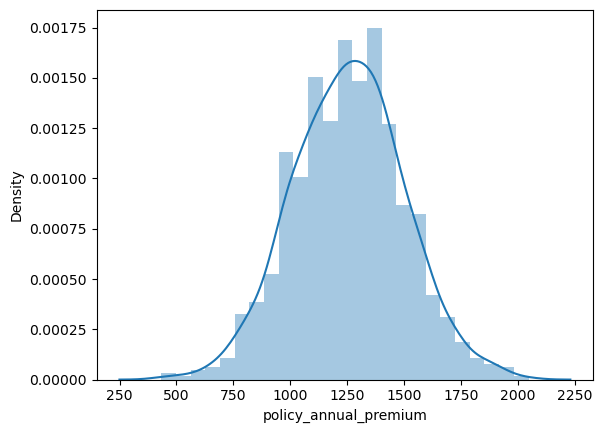

In [34]:
sns.distplot(df1['policy_annual_premium'])

<AxesSubplot:xlabel='policy_annual_premium'>

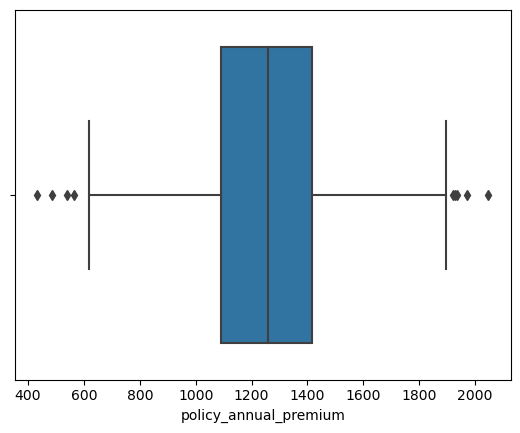

In [35]:
sns.boxplot(df1['policy_annual_premium'])

In [36]:
df1['umbrella_limit'].value_counts()

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

[Text(0, 0, '-1000000'),
 Text(1, 0, '0'),
 Text(2, 0, '2000000'),
 Text(3, 0, '3000000'),
 Text(4, 0, '4000000'),
 Text(5, 0, '5000000'),
 Text(6, 0, '6000000'),
 Text(7, 0, '7000000'),
 Text(8, 0, '8000000'),
 Text(9, 0, '9000000'),
 Text(10, 0, '10000000')]

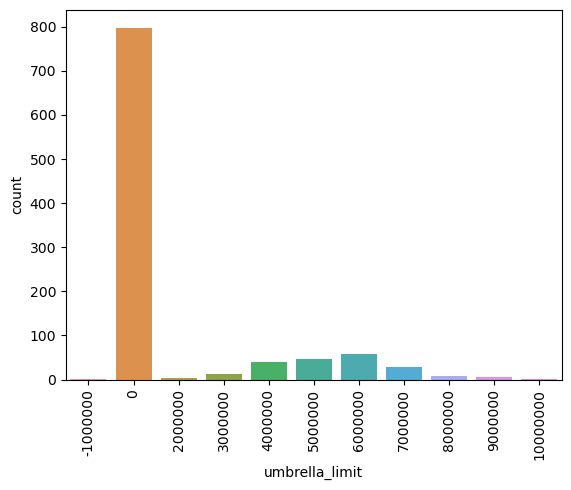

In [37]:
count1=sns.countplot(df1['umbrella_limit'])
count1.set_xticklabels(count1.get_xticklabels(),rotation=90)

In [38]:
le.fit(df1['umbrella_limit'])
label_umbrella_limit=dict(zip(range(len(le.classes_)),le.classes_)) 

In [39]:
df1['umbrella_limit']=le.fit_transform(df1['umbrella_limit'])

<AxesSubplot:xlabel='insured_zip', ylabel='Density'>

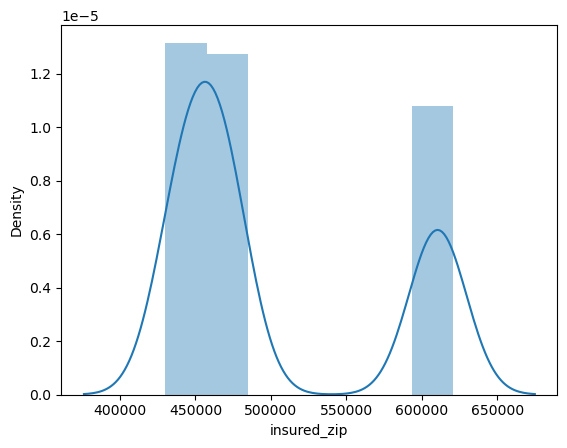

In [40]:
sns.distplot(df1['insured_zip'])

In [41]:
df1['insured_sex'].value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

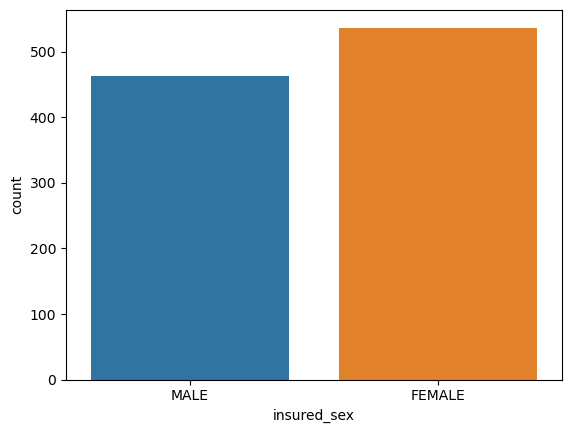

In [42]:
sns.countplot(df1['insured_sex'])

In [43]:
le.fit(df1['insured_sex'])
label_insured_sex=dict(zip(range(len(le.classes_)),le.classes_)) 

In [44]:
df1['insured_sex']=le.fit_transform(df1['insured_sex'])

In [45]:
df1['insured_education_level'].value_counts()

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

[Text(0, 0, 'MD'),
 Text(1, 0, 'PhD'),
 Text(2, 0, 'Associate'),
 Text(3, 0, 'Masters'),
 Text(4, 0, 'High School'),
 Text(5, 0, 'College'),
 Text(6, 0, 'JD')]

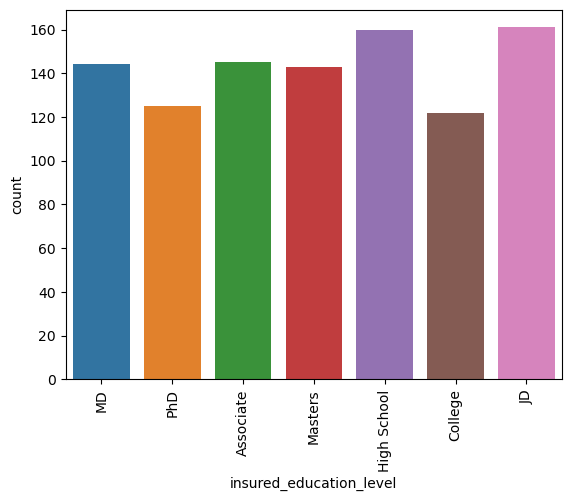

In [46]:
count79=sns.countplot(df1['insured_education_level'])
count79.set_xticklabels(count79.get_xticklabels(),rotation=90)

In [47]:
le.fit(df1['insured_education_level'])
label_insured_education_level=dict(zip(range(len(le.classes_)),le.classes_)) 

In [48]:
df1['insured_education_level']=le.fit_transform(df1['insured_education_level'])

In [49]:
df1['insured_occupation'].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

[Text(0, 0, 'craft-repair'),
 Text(1, 0, 'machine-op-inspct'),
 Text(2, 0, 'sales'),
 Text(3, 0, 'armed-forces'),
 Text(4, 0, 'tech-support'),
 Text(5, 0, 'prof-specialty'),
 Text(6, 0, 'other-service'),
 Text(7, 0, 'priv-house-serv'),
 Text(8, 0, 'exec-managerial'),
 Text(9, 0, 'protective-serv'),
 Text(10, 0, 'transport-moving'),
 Text(11, 0, 'handlers-cleaners'),
 Text(12, 0, 'adm-clerical'),
 Text(13, 0, 'farming-fishing')]

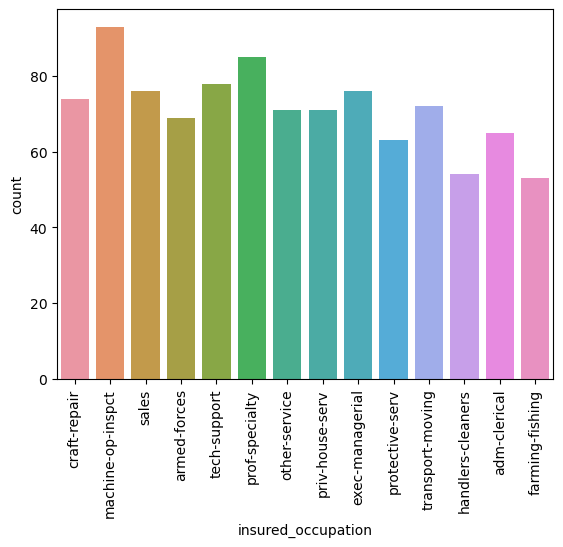

In [50]:
count84=sns.countplot(df1['insured_occupation'])
count84.set_xticklabels(count84.get_xticklabels(),rotation=90)

In [51]:
le.fit(df1['insured_occupation'])
label_insured_occupation=dict(zip(range(len(le.classes_)),le.classes_)) 

In [52]:
df1['insured_occupation']=le.fit_transform(df1['insured_occupation'])

In [53]:
df1['insured_hobbies'].value_counts()

reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

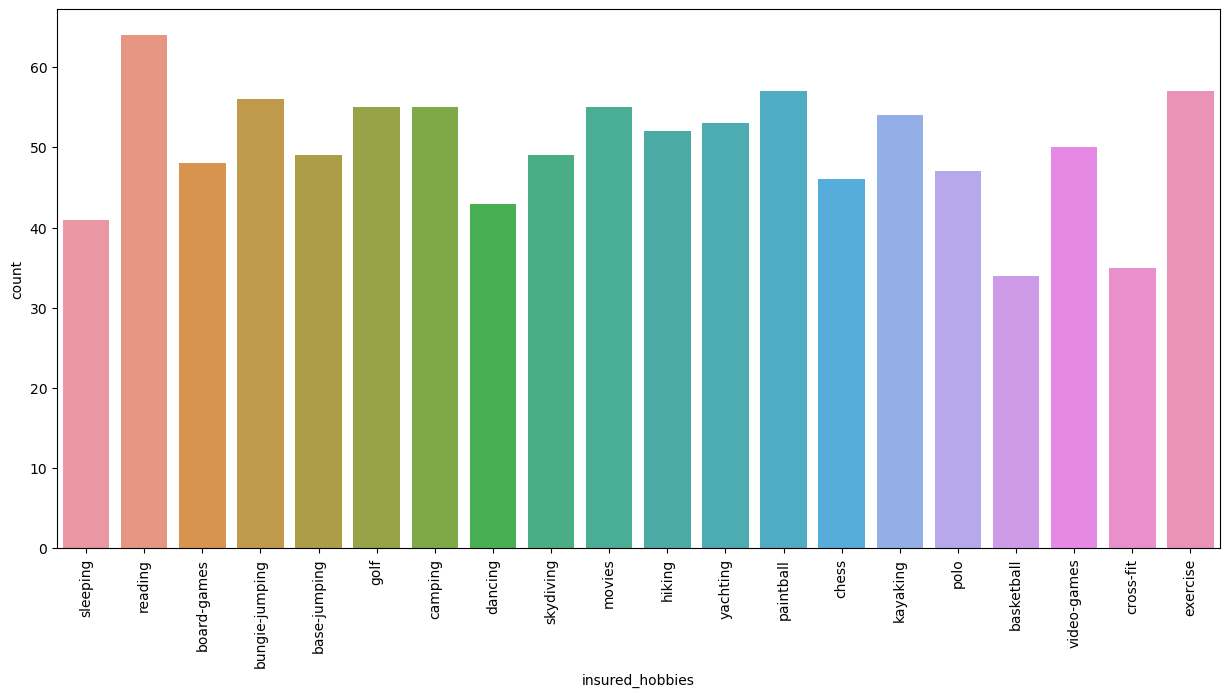

In [54]:
plt.figure(figsize=(15,7))
count90=sns.countplot(df1['insured_hobbies'])
count90.set_xticklabels(count90.get_xticklabels(),rotation=90)
plt.show()

In [55]:
le.fit(df1['insured_hobbies'])
label_insured_hobbies=dict(zip(range(len(le.classes_)),le.classes_)) 
time.sleep(2)
df1['insured_hobbies']=le.fit_transform(df1['insured_hobbies'])

In [56]:
df1['insured_relationship'].value_counts()

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64

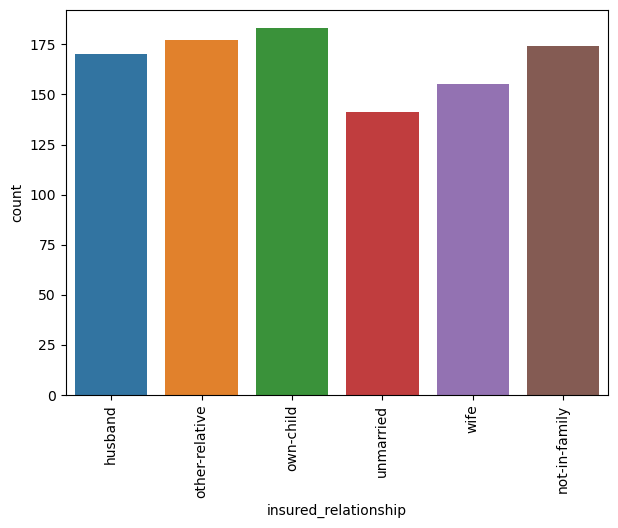

In [57]:
plt.figure(figsize=(7,5))
count95=sns.countplot(df1['insured_relationship'])
count95.set_xticklabels(count95.get_xticklabels(),rotation=90)
plt.show()

In [58]:
le.fit(df1['insured_relationship'])
label_insured_relationship=dict(zip(range(len(le.classes_)),le.classes_)) 
time.sleep(2)
df1['insured_relationship']=le.fit_transform(df1['insured_relationship'])

<AxesSubplot:xlabel='capital-gains', ylabel='Density'>

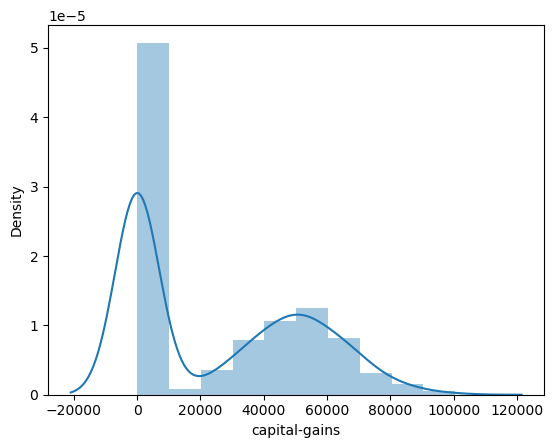

In [59]:
sns.distplot(df1['capital-gains'])

<AxesSubplot:xlabel='capital-gains'>

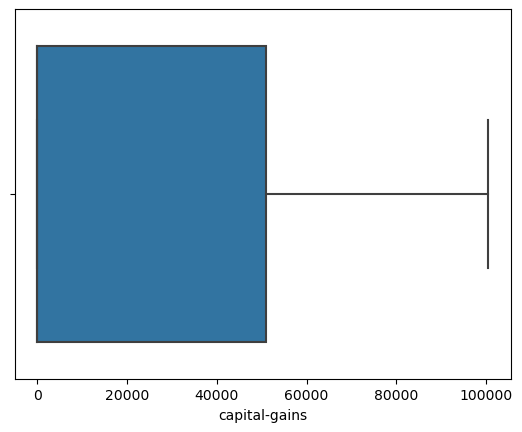

In [60]:
sns.boxplot(df1['capital-gains'])

<AxesSubplot:xlabel='capital-loss', ylabel='Density'>

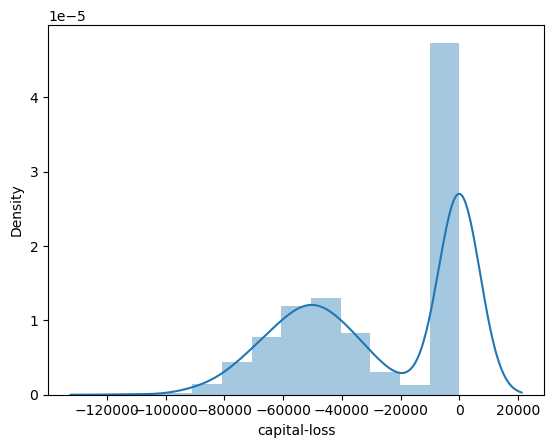

In [61]:
sns.distplot(df1['capital-loss'])

<AxesSubplot:xlabel='capital-loss'>

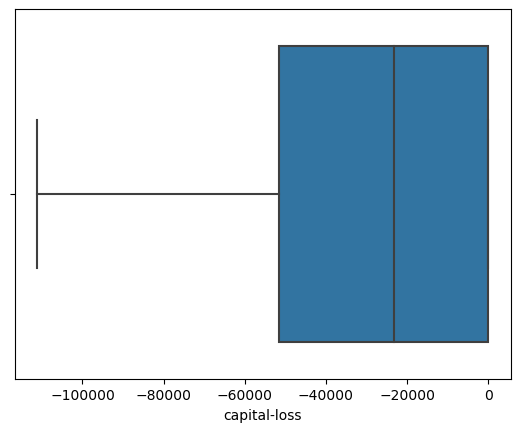

In [62]:
sns.boxplot(df1['capital-loss'])

In [63]:
df1['incident_date'].head()

0    25-01-2015
1    21-01-2015
2    22-02-2015
3    10-01-2015
4    17-02-2015
Name: incident_date, dtype: object

In [64]:
df1.drop('incident_date',axis=1,inplace=True)

In [65]:
df1['incident_type'].value_counts()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

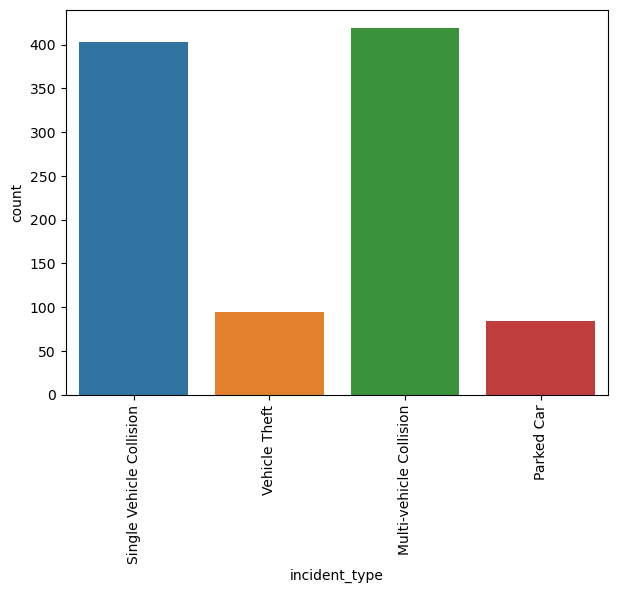

In [66]:
plt.figure(figsize=(7,5))
count110=sns.countplot(df1['incident_type'])
count110.set_xticklabels(count110.get_xticklabels(),rotation=90)
plt.show()

In [67]:
le.fit(df1['incident_type'])
label_incident_type=dict(zip(range(len(le.classes_)),le.classes_)) 
time.sleep(2)
df1['incident_type']=le.fit_transform(df1['incident_type'])

In [68]:
df1['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [69]:
df1['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [70]:
df1['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

<AxesSubplot:xlabel='collision_type', ylabel='count'>

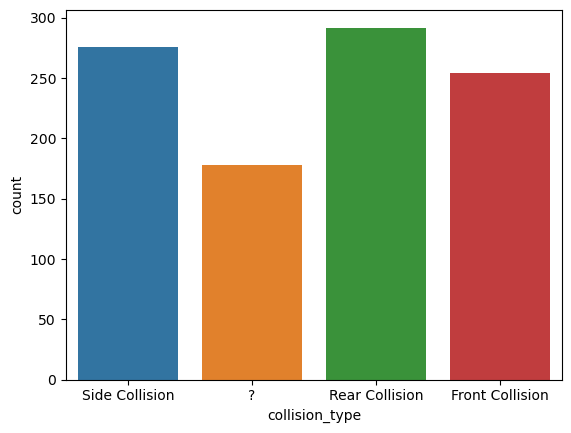

In [71]:
sns.countplot(df1['collision_type'])

In [72]:
le.fit(df1['collision_type'])
label_collision_typet=dict(zip(range(len(le.classes_)),le.classes_)) 
time.sleep(2)
df1['collision_type']=le.fit_transform(df1['collision_type'])

In [73]:
df1['incident_severity'].value_counts()

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

<AxesSubplot:xlabel='incident_severity', ylabel='count'>

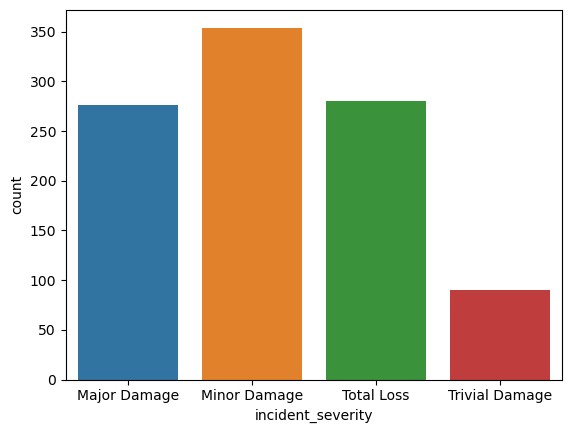

In [74]:
sns.countplot(df1['incident_severity'])

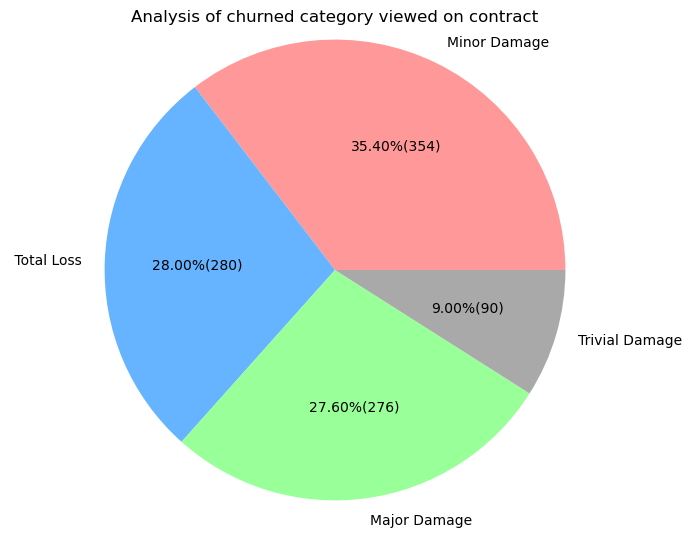

In [75]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
langs=['Minor Damage',' Total Loss','Major Damage','Trivial Damage']
value=[354,280,276,90]
colors = ['#ff9999','#66b3ff','#99ff99','darkgray']
ax.pie(value,labels=langs,colors=colors,radius=1.2,autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*sum(value)))
plt.title('Analysis of churned category viewed on contract')
plt.show()

In [76]:
le.fit(df1['incident_severity'])
label_incident_severity=dict(zip(range(len(le.classes_)),le.classes_)) 
time.sleep(2)
df1['incident_severity']=le.fit_transform(df1['incident_severity'])

In [77]:
df1['authorities_contacted'].value_counts()

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64

<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

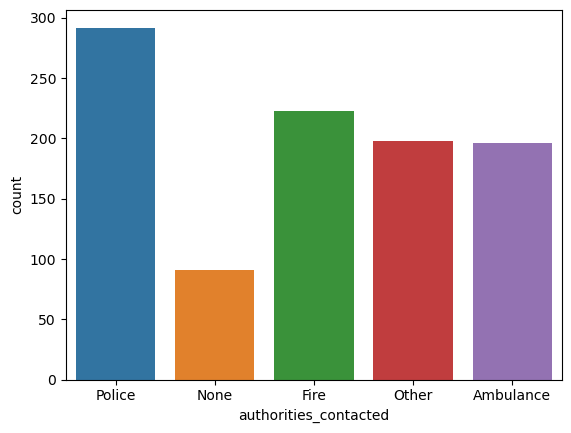

In [79]:
sns.countplot(df1['authorities_contacted'])

In [80]:
le.fit(df1['authorities_contacted'])
label_authorities_contacted=dict(zip(range(len(le.classes_)),le.classes_)) 
time.sleep(2)
df1['authorities_contacted']=le.fit_transform(df1['authorities_contacted'])

In [81]:
df1['incident_state'].value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

<AxesSubplot:xlabel='incident_state', ylabel='count'>

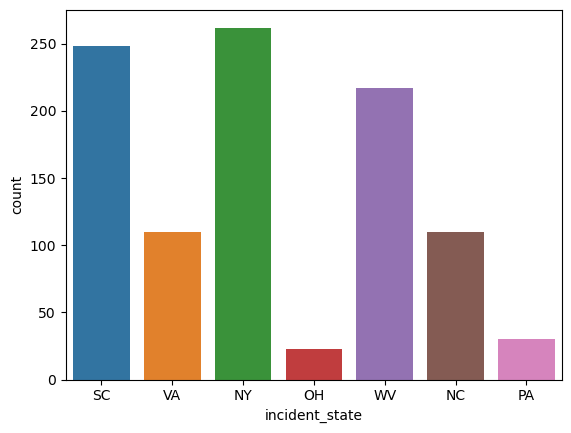

In [82]:
sns.countplot(df1['incident_state'])

In [83]:
le.fit(df1['incident_state'])
label_incident_state=dict(zip(range(len(le.classes_)),le.classes_)) 
time.sleep(2)
df1['incident_state']=le.fit_transform(df1['incident_state'])

In [84]:
df1['incident_city'].value_counts()

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64

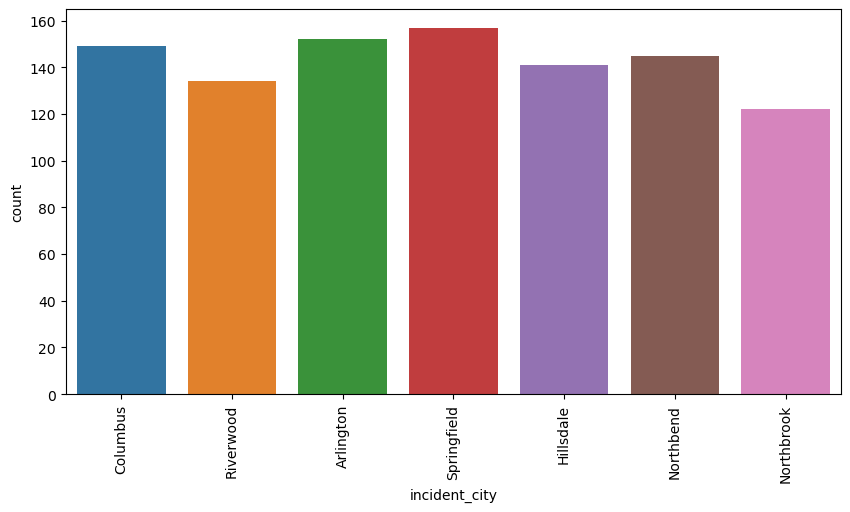

In [85]:
plt.figure(figsize=(10,5))
count129=sns.countplot(df1['incident_city'])
count129.set_xticklabels(count129.get_xticklabels(),rotation=90)
plt.show()

In [86]:
le.fit(df1['incident_city'])
label_incident_city=dict(zip(range(len(le.classes_)),le.classes_)) 
time.sleep(2)
df1['incident_city']=le.fit_transform(df1['incident_city'])

In [87]:
df1.drop('incident_location',axis=1,inplace=True)

In [88]:
df1['incident_hour_of_the_day'].value_counts()

17    54
3     53
0     52
23    51
16    49
13    46
10    46
4     46
6     44
9     43
14    43
21    42
18    41
12    40
19    40
7     40
15    39
22    38
8     36
20    34
5     33
2     31
11    30
1     29
Name: incident_hour_of_the_day, dtype: int64

<AxesSubplot:xlabel='incident_hour_of_the_day', ylabel='Density'>

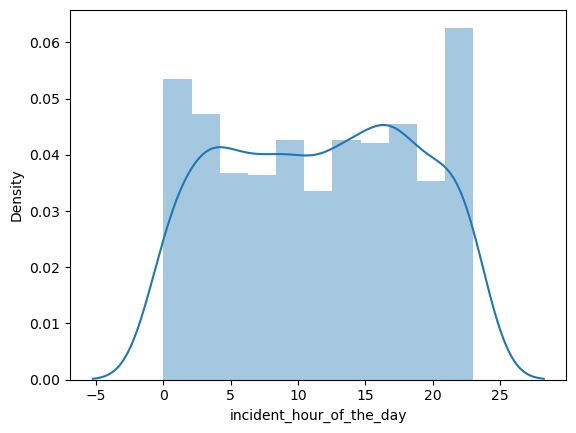

In [89]:
sns.distplot(df1['incident_hour_of_the_day'])

In [90]:
df1['number_of_vehicles_involved'].value_counts()

1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64

<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='count'>

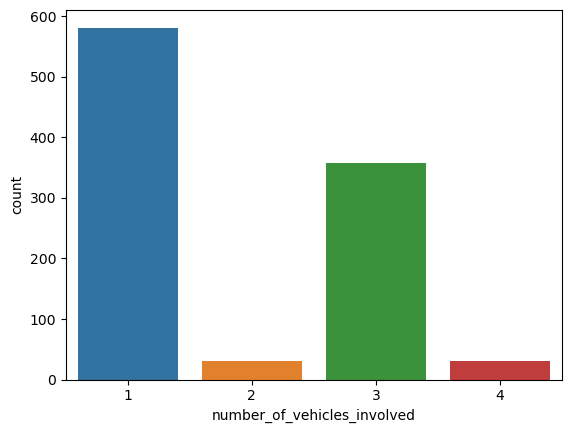

In [95]:
sns.countplot(df1['number_of_vehicles_involved'])

In [92]:
df1['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [93]:
df1['property_damage'].replace('?',np.nan,inplace=True)

In [94]:
df1['property_damage'].replace('bfill',np.nan,inplace=True)
df1['property_damage'].fillna(method='bfill',inplace=True)

In [96]:
df1['property_damage'].value_counts()

NO     525
YES    472
Name: property_damage, dtype: int64

<AxesSubplot:xlabel='property_damage', ylabel='count'>

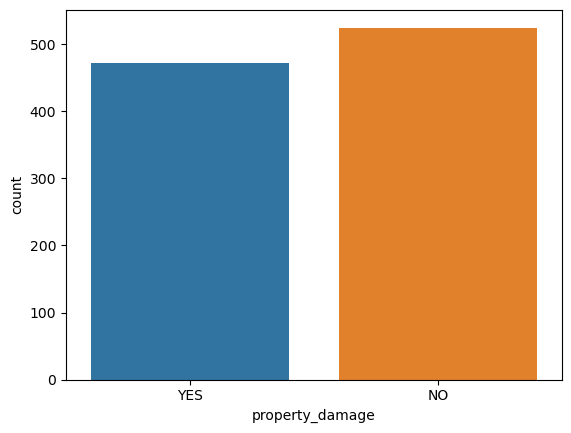

In [97]:
sns.countplot(df1['property_damage'])

In [98]:
df1['bodily_injuries'].value_counts()

0    340
2    332
1    328
Name: bodily_injuries, dtype: int64

<AxesSubplot:xlabel='bodily_injuries', ylabel='count'>

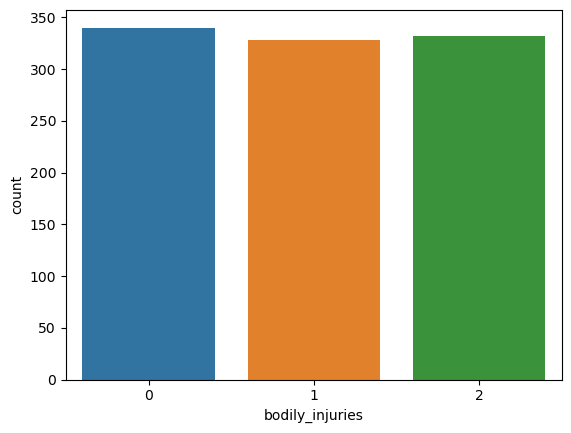

In [99]:
sns.countplot(df['bodily_injuries'])

In [100]:
df1['witnesses'].value_counts()

1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64

<AxesSubplot:xlabel='witnesses', ylabel='count'>

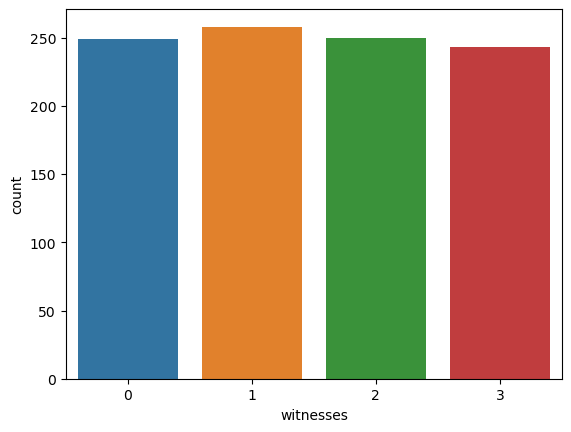

In [101]:
sns.countplot(df1['witnesses'])

In [102]:
df1['police_report_available'].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [103]:
df1['police_report_available'].replace('?',np.nan,inplace=True)
time.sleep(3)
df1['police_report_available'].fillna(method='bfill',inplace=True)

In [104]:
df1['police_report_available'].value_counts()

NO     514
YES    485
Name: police_report_available, dtype: int64

In [105]:
df1['police_report_available'].fillna('YES',inplace=True)

In [106]:
df1['police_report_available'].isnull().sum()

0

<AxesSubplot:xlabel='police_report_available', ylabel='count'>

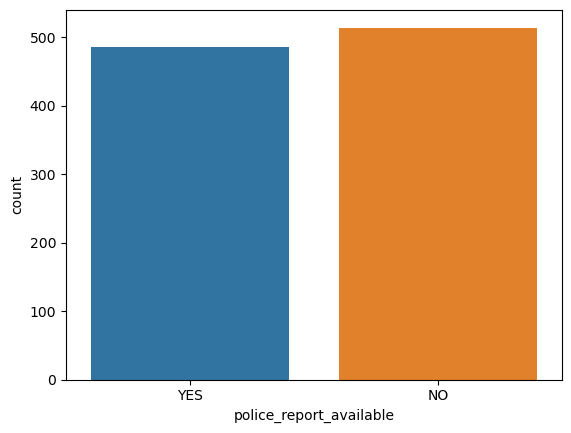

In [107]:
sns.countplot(df1['police_report_available'])

<AxesSubplot:xlabel='total_claim_amount', ylabel='Density'>

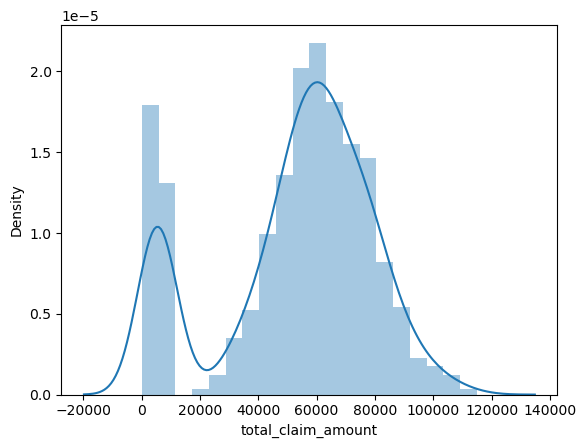

In [108]:
sns.distplot(df1['total_claim_amount'])

<AxesSubplot:xlabel='total_claim_amount'>

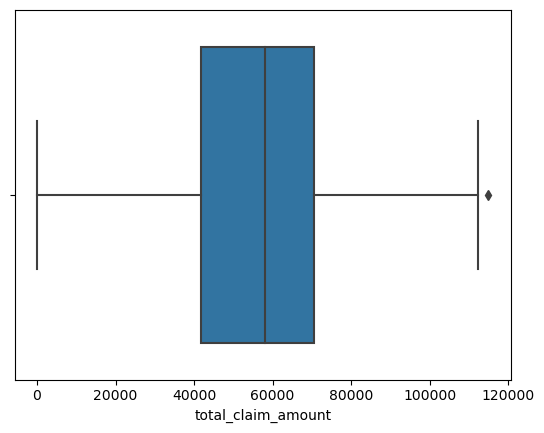

In [109]:
sns.boxplot(df1['total_claim_amount'])

<AxesSubplot:xlabel='injury_claim', ylabel='Density'>

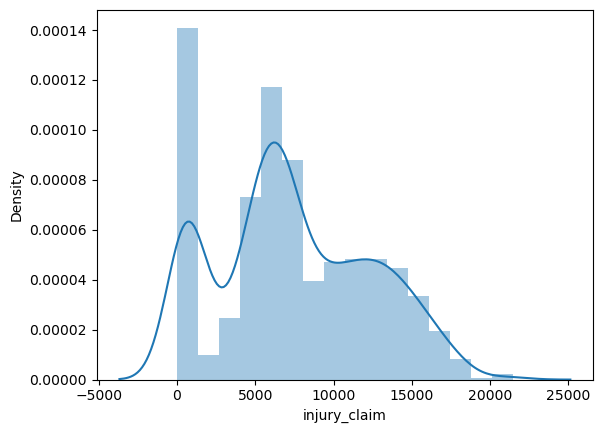

In [110]:
sns.distplot(df1['injury_claim'])

<AxesSubplot:xlabel='injury_claim'>

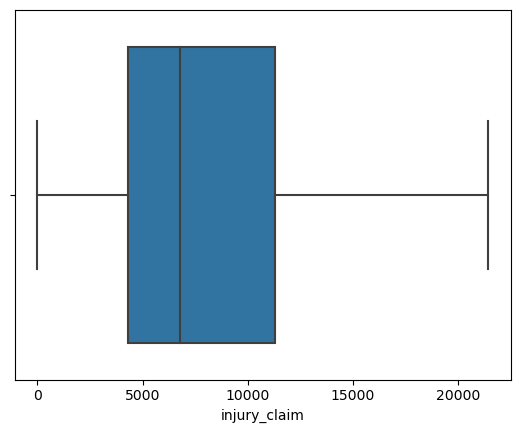

In [111]:
sns.boxplot(df1['injury_claim'])

<AxesSubplot:xlabel='property_claim', ylabel='Density'>

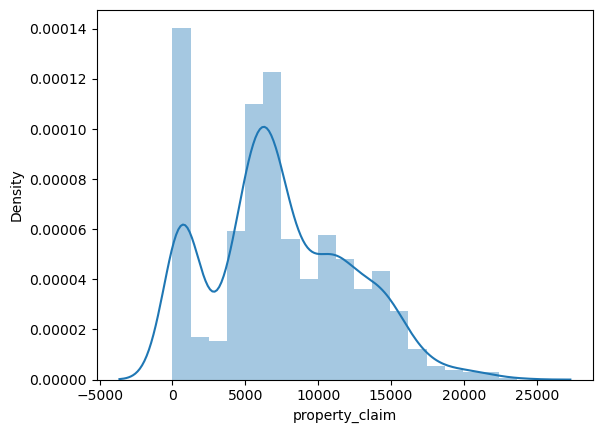

In [112]:
sns.distplot(df1['property_claim'])

<AxesSubplot:xlabel='property_claim'>

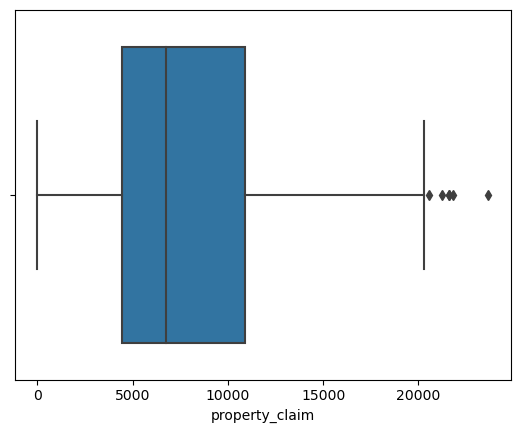

In [113]:
sns.boxplot(df1['property_claim'])

<AxesSubplot:xlabel='vehicle_claim', ylabel='Density'>

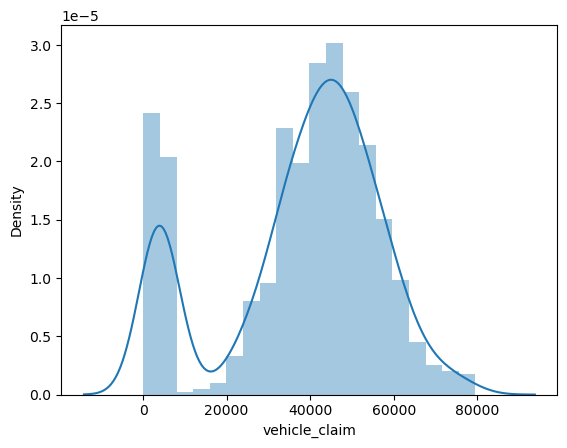

In [114]:
sns.distplot(df1['vehicle_claim'])

<AxesSubplot:xlabel='vehicle_claim'>

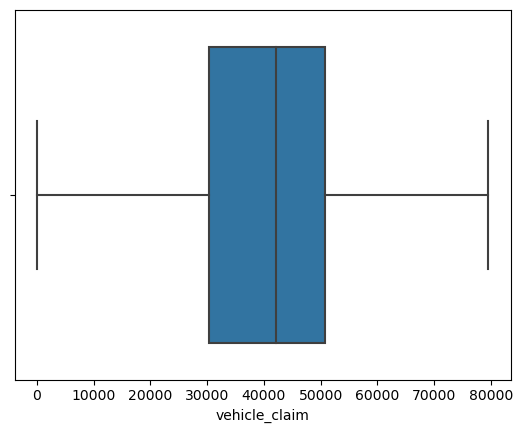

In [115]:
sns.boxplot(df1['vehicle_claim'])

In [116]:
df1['auto_make'].value_counts()

Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64

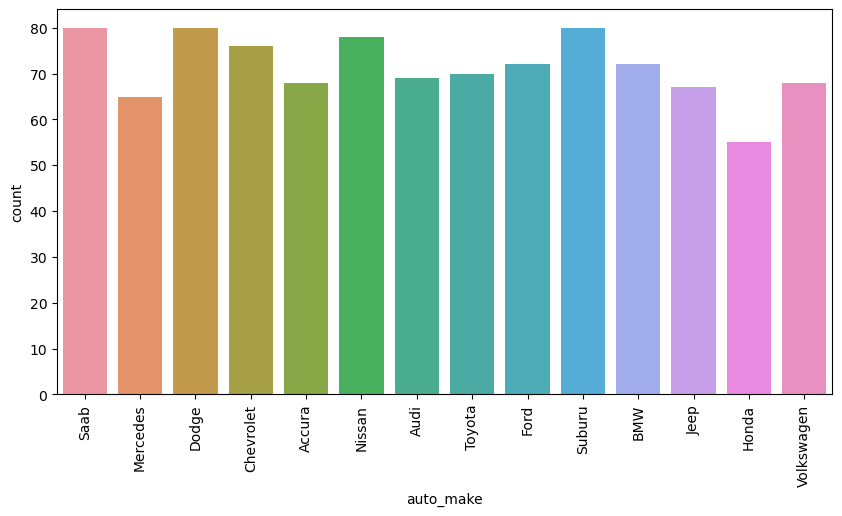

In [117]:
plt.figure(figsize=(10,5))
count181=sns.countplot(df1['auto_make'])
count181.set_xticklabels(count181.get_xticklabels(),rotation=90)
plt.show()
    

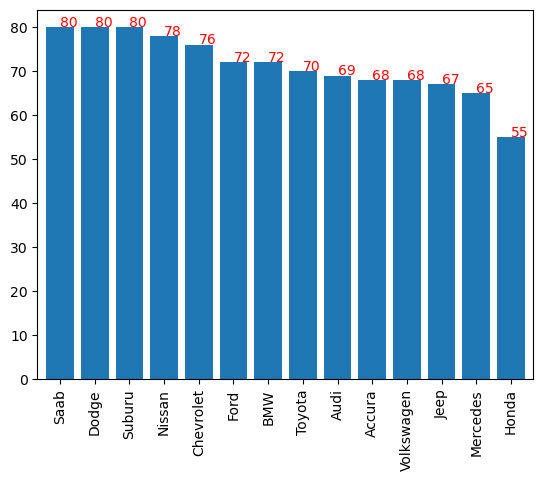

In [118]:
s = df1['auto_make'].value_counts()
ax=s.plot.bar(width=.8) 
for i, v in s.reset_index().iterrows():
    ax.text(i, v.auto_make + 0.2 , v.auto_make, color='red')

In [119]:
le.fit(df1['auto_make'])
label_auto_make=dict(zip(range(len(le.classes_)),le.classes_)) 
time.sleep(2)
df1['auto_make']=le.fit_transform(df1['auto_make'])

In [120]:
df1['auto_model'].value_counts()

RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
92x               28
Camry             28
Forrestor         28
F150              27
95                27
E400              27
93                25
Grand Cherokee    25
Escape            24
Tahoe             24
Maxima            24
Ultima            23
X5                23
Highlander        22
Civic             22
Silverado         22
Fusion            21
ML350             20
Impreza           20
Corolla           20
TL                20
CRV               20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64

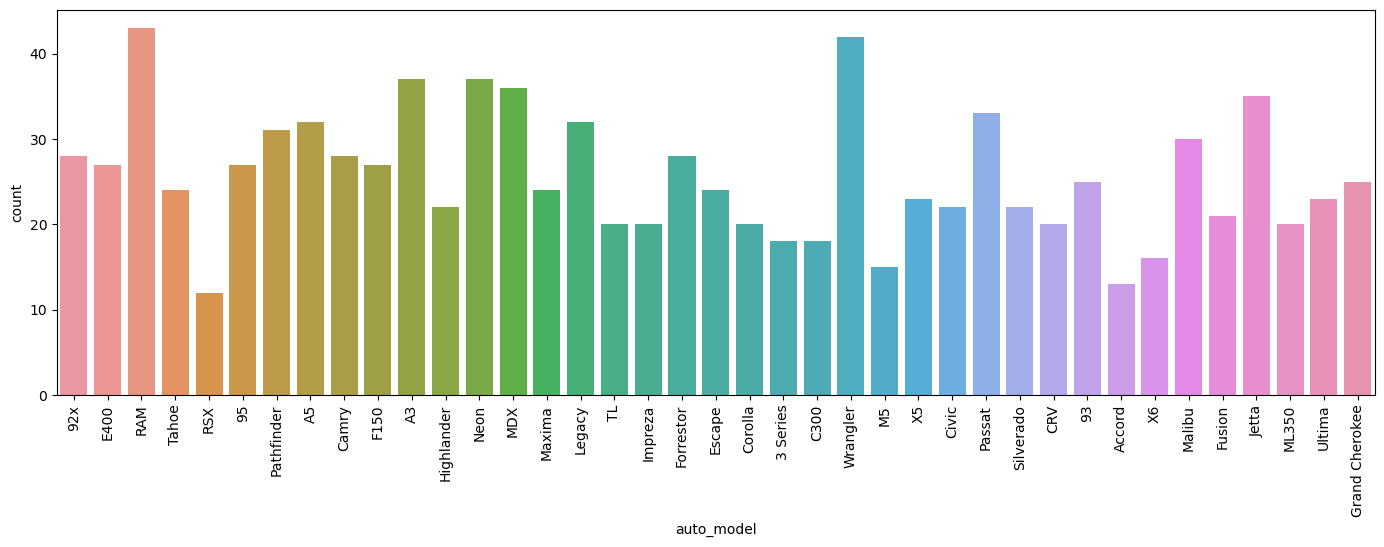

In [121]:
plt.figure(figsize=(17,5))
count185=sns.countplot(df1['auto_model'])
count185.set_xticklabels(count185.get_xticklabels(),rotation=90)
plt.show()

In [122]:
le.fit(df1['auto_model'])
label_auto_model=dict(zip(range(len(le.classes_)),le.classes_)) 
time.sleep(2)
df1['auto_model']=le.fit_transform(df1['auto_model'])

In [123]:
df1['auto_year'].value_counts()

1995    56
1999    55
2005    54
2006    53
2011    53
2007    52
2003    51
2009    50
2010    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64

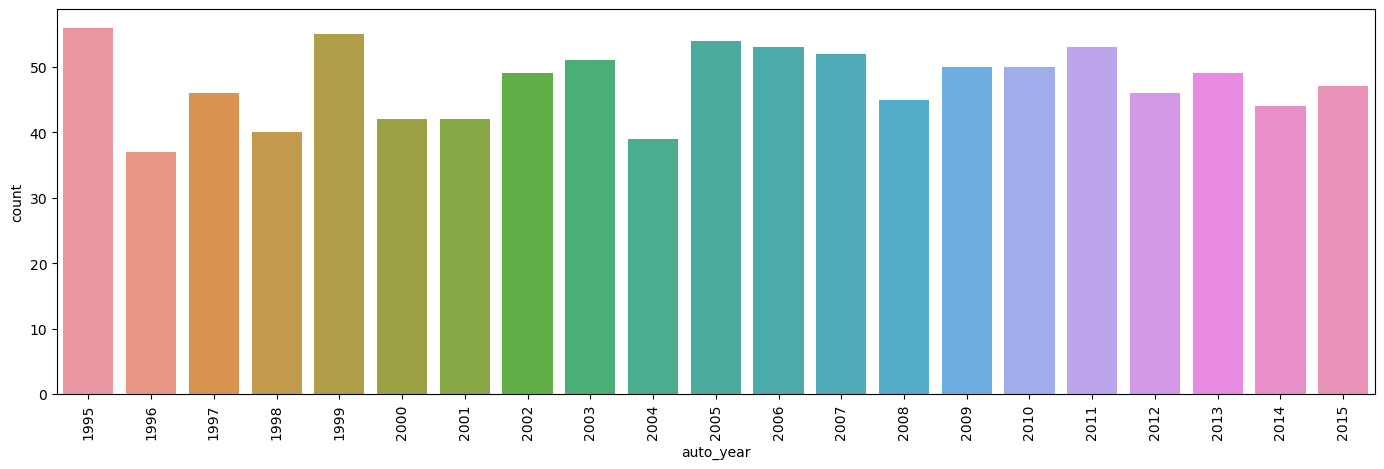

In [124]:
plt.figure(figsize=(17,5))
count190=sns.countplot(df1['auto_year'])
count190.set_xticklabels(count190.get_xticklabels(),rotation=90)
plt.show()

In [125]:
df2=df1.iloc[0:997]

In [126]:
df2['property_damage'].value_counts()

NO     525
YES    472
Name: property_damage, dtype: int64

In [127]:
df2['property_damage'].replace(['NO','YES'],[0,1],inplace=True)

In [128]:
le.fit(df2['police_report_available'])
label_police_report_available=dict(zip(range(len(le.classes_)),le.classes_)) 
time.sleep(2)
df2['police_report_available']=le.fit_transform(df2['police_report_available'])

In [129]:
le.fit(df2['auto_year'])
label_auto_year=dict(zip(range(len(le.classes_)),le.classes_)) 
time.sleep(2)
df2['auto_year']=le.fit_transform(df2['auto_year'])

In [130]:
df2['fraud_reported'].value_counts()

N    750
Y    247
Name: fraud_reported, dtype: int64

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

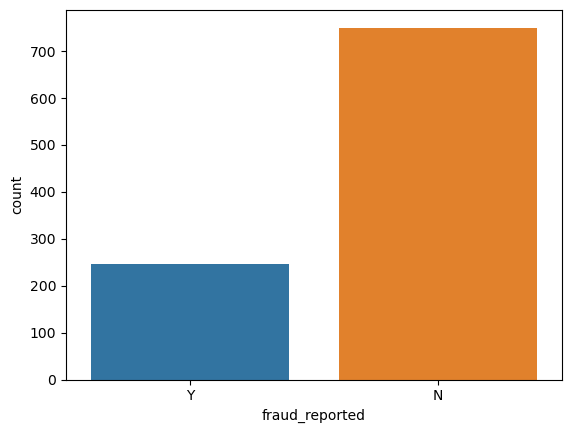

In [131]:
sns.countplot(df2['fraud_reported'])

In [132]:
le.fit(df2['fraud_reported'])
label_fraud_reported=dict(zip(range(len(le.classes_)),le.classes_)) 
time.sleep(2)
df2['fraud_reported']=le.fit_transform(df2['fraud_reported'])

In [133]:
le.fit(df2['policy_bind_year'])
label_policy_bind_year=dict(zip(range(len(le.classes_)),le.classes_)) 
time.sleep(2)
df2['policy_bind_year']=le.fit_transform(df2['policy_bind_year'])

In [135]:
#Sorting the correlation value
corr_matrix=df2.corr()
corr_matrix['fraud_reported'].sort_values(ascending=False)

fraud_reported                 1.000000
vehicle_claim                  0.169823
total_claim_amount             0.163185
property_claim                 0.137021
collision_type                 0.110413
injury_claim                   0.090047
umbrella_limit                 0.058831
number_of_vehicles_involved    0.051641
witnesses                      0.050934
bodily_injuries                0.033283
insured_sex                    0.030484
policy_state                   0.030174
property_damage                0.023570
months_as_customer             0.022828
insured_relationship           0.021016
insured_zip                    0.019358
age                            0.014701
policy_deductable              0.007711
insured_education_level        0.007684
auto_year                      0.006577
incident_hour_of_the_day       0.002426
insured_occupation             0.001143
policy_bind_year               0.000346
auto_model                    -0.000414
capital-loss                  -0.013244


In [136]:
fraud=df2.groupby('fraud_reported')
fraud_0=fraud.get_group(0)
fraud_1=fraud.get_group(1)

In [137]:
fraud_0.describe()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_year
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,...,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.0,750.000000
mean,202.018667,38.832000,0.998667,0.966667,0.961333,1258.788253,1.832000,500425.521333,0.454667,2.961333,...,0.493333,50330.373333,7190.373333,7028.773333,36111.226667,6.609333,19.342667,10.094667,0.0,11.597333
std,113.007318,8.916077,0.832419,0.810616,0.798763,240.989355,1.852661,72090.011088,0.498273,1.946507,...,0.500289,27573.425532,4964.520784,4832.952928,19692.751897,4.042256,11.196207,5.998028,0.0,7.387464
min,0.000000,20.000000,0.000000,0.000000,0.000000,433.330000,0.000000,430104.000000,0.000000,0.000000,...,0.000000,100.000000,0.000000,0.000000,70.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,114.250000,32.000000,0.000000,0.000000,0.000000,1097.657500,1.000000,446790.000000,0.000000,1.000000,...,0.000000,34687.500000,3485.000000,3720.000000,25270.000000,3.000000,9.250000,5.000000,0.0,5.000000
50%,199.500000,38.000000,1.000000,1.000000,1.000000,1252.800000,1.000000,465719.000000,0.000000,3.000000,...,0.000000,56560.000000,6620.000000,6570.000000,41260.000000,7.000000,20.000000,10.000000,0.0,12.000000
75%,275.750000,44.000000,2.000000,2.000000,2.000000,1422.725000,1.000000,603177.000000,1.000000,5.000000,...,1.000000,69592.500000,11150.000000,10660.000000,49965.000000,10.000000,29.000000,15.000000,0.0,18.000000
max,479.000000,64.000000,2.000000,2.000000,2.000000,2047.590000,10.000000,620962.000000,1.000000,6.000000,...,1.000000,114920.000000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,20.000000,0.0,25.000000


In [138]:
fraud_1.describe()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_year
count,247.000000,247.000000,247.00000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,...,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.0,247.000000
mean,208.080972,39.141700,1.05668,0.898785,0.975709,1250.236275,2.093117,503637.959514,0.489879,2.995951,...,0.457490,60302.105263,8208.340081,8560.121457,43533.643725,6.352227,19.331984,10.186235,1.0,11.603239
std,119.824064,9.648295,0.82444,0.787271,0.826035,253.263651,2.092241,70487.502045,0.500913,1.947477,...,0.499201,20746.279567,4550.307780,4631.741098,14849.388907,4.012357,10.994969,6.071871,0.0,7.303835
min,3.000000,19.000000,0.00000,0.000000,0.000000,484.670000,1.000000,430141.000000,0.000000,0.000000,...,0.000000,2860.000000,0.000000,0.000000,2080.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,116.000000,32.000000,0.00000,0.000000,0.000000,1062.615000,1.000000,452924.500000,0.000000,1.000000,...,0.000000,51910.000000,5370.000000,5815.000000,37170.000000,3.000000,10.000000,5.000000,1.0,5.000000
50%,199.000000,38.000000,1.00000,1.000000,1.000000,1269.640000,1.000000,469853.000000,0.000000,3.000000,...,0.000000,61290.000000,7240.000000,7440.000000,44800.000000,6.000000,20.000000,11.000000,1.0,12.000000
75%,279.000000,45.000000,2.00000,2.000000,2.000000,1396.330000,1.000000,603807.000000,1.000000,5.000000,...,1.000000,72665.000000,11900.000000,11300.000000,52080.000000,10.000000,29.000000,16.000000,1.0,18.000000
max,478.000000,63.000000,2.00000,2.000000,2.000000,1935.850000,10.000000,620819.000000,1.000000,6.000000,...,1.000000,112320.000000,20700.000000,21810.000000,77760.000000,13.000000,38.000000,20.000000,1.0,24.000000


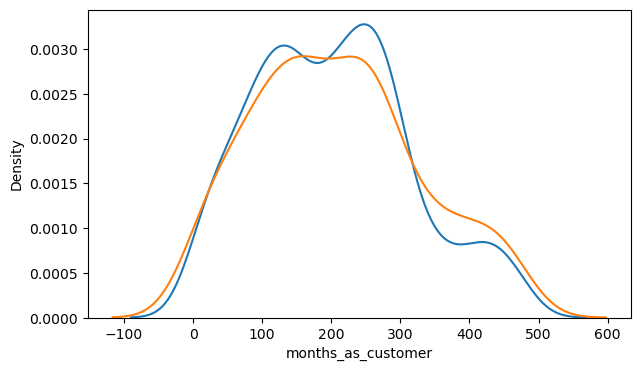

In [139]:
plt.figure(figsize=(7,4))
sns.distplot(fraud_0['months_as_customer'],hist=False,rug=False)
sns.distplot(fraud_1['months_as_customer'],hist=False,rug=False)
plt.show()

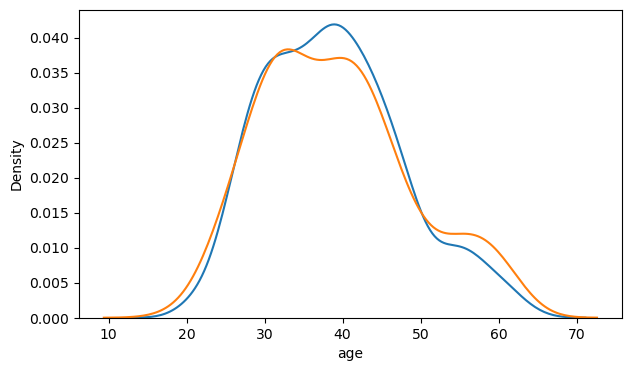

In [140]:
plt.figure(figsize=(7,4))
sns.distplot(fraud_0['age'],hist=False,rug=False)
sns.distplot(fraud_1['age'],hist=False,rug=False)
plt.show()

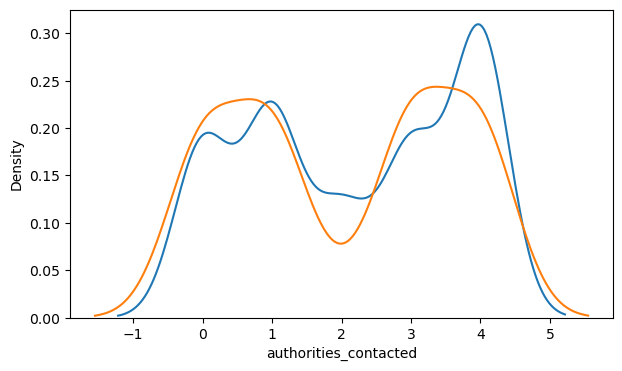

In [141]:
plt.figure(figsize=(7,4))
sns.distplot(fraud_0['authorities_contacted'],hist=False,rug=False)
sns.distplot(fraud_1['authorities_contacted'],hist=False,rug=False)
plt.show()

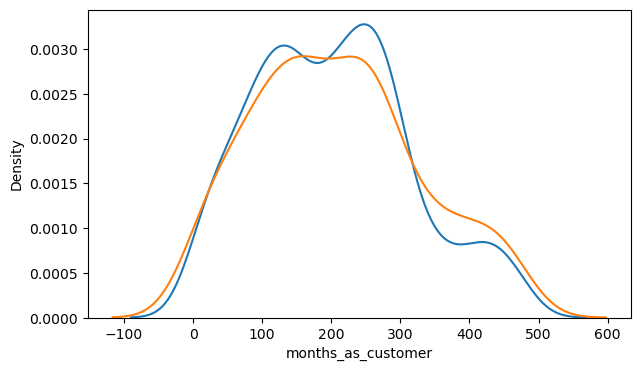

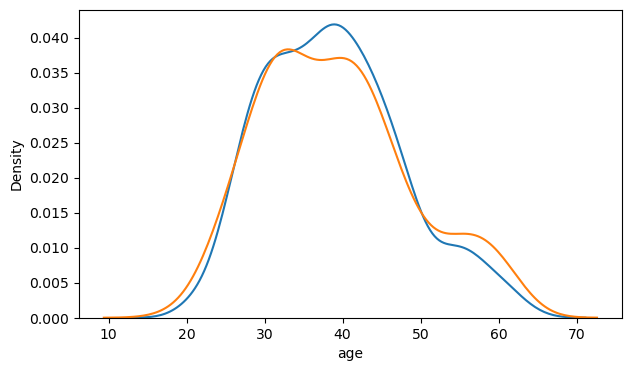

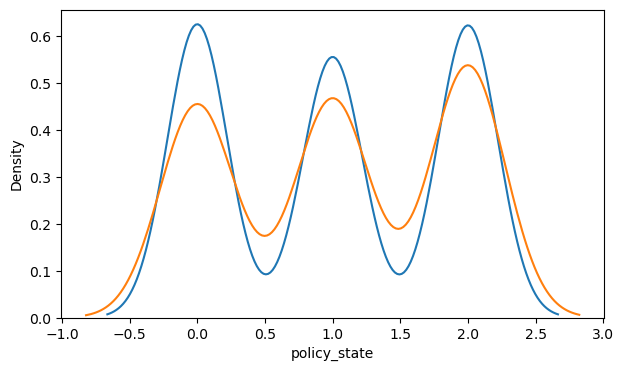

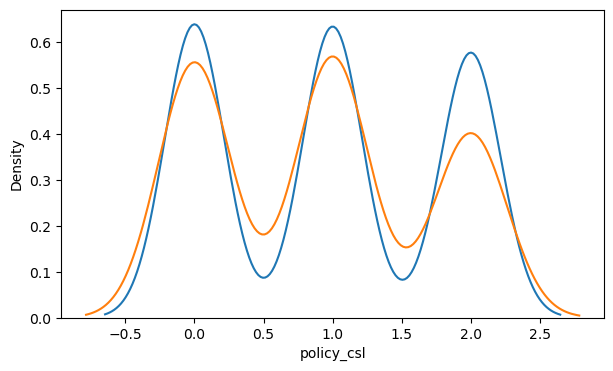

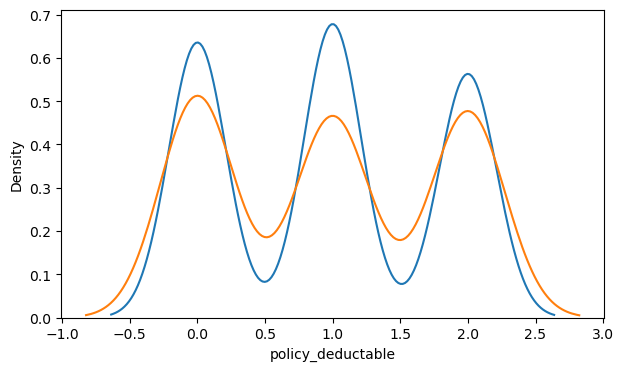

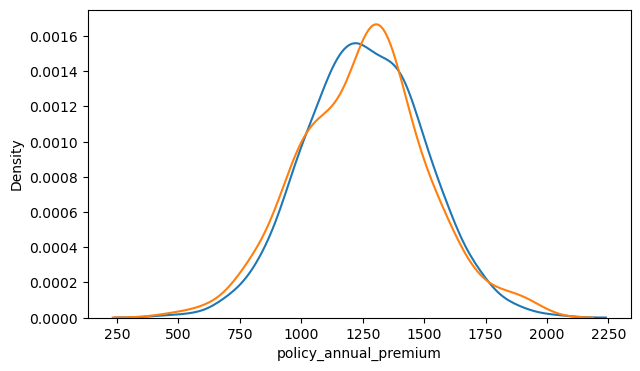

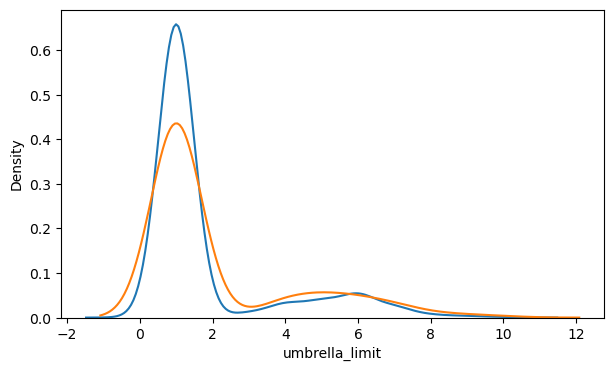

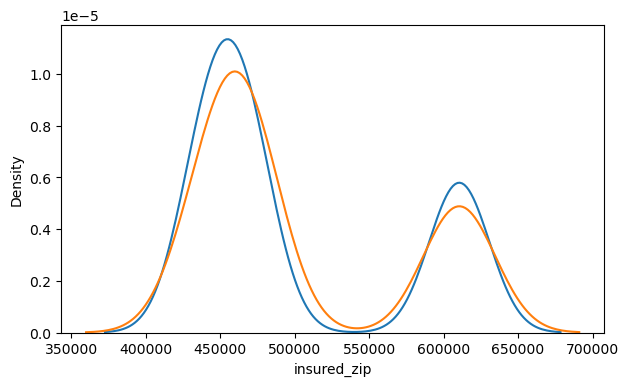

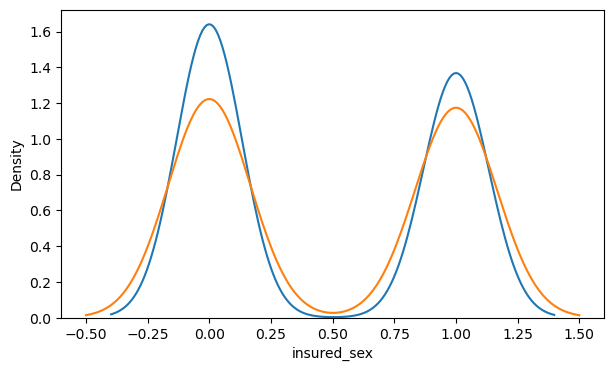

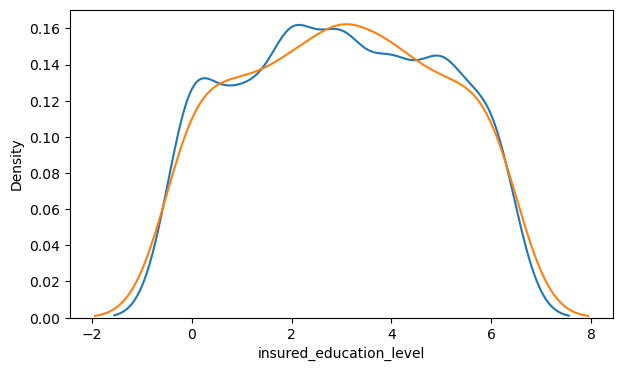

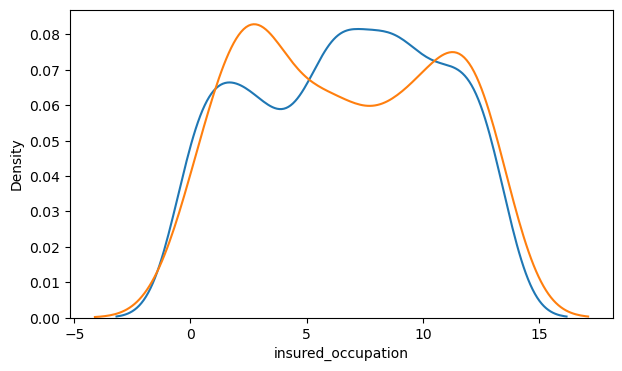

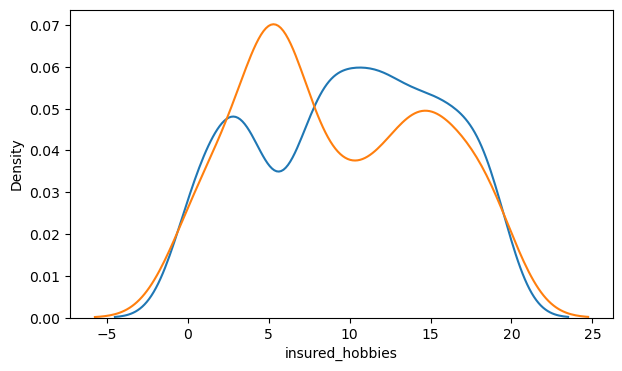

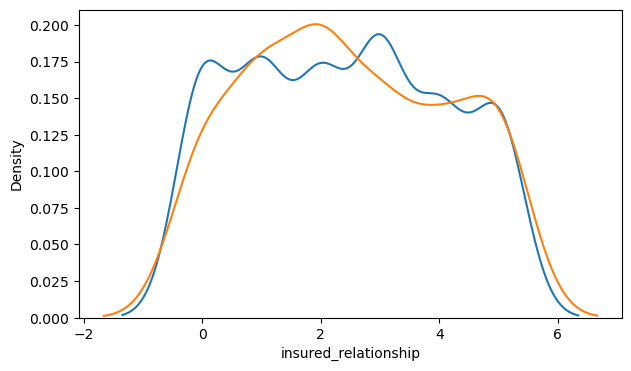

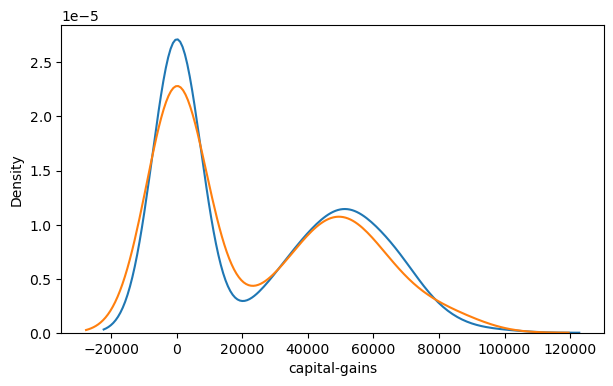

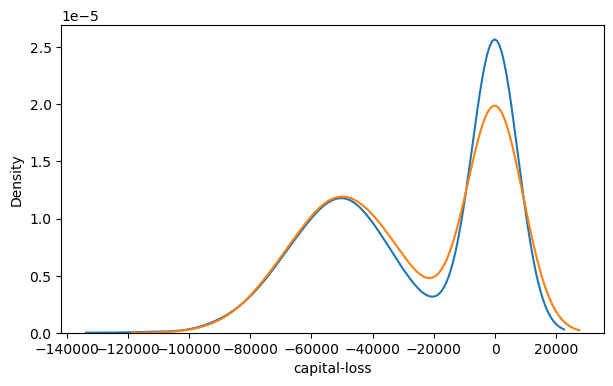

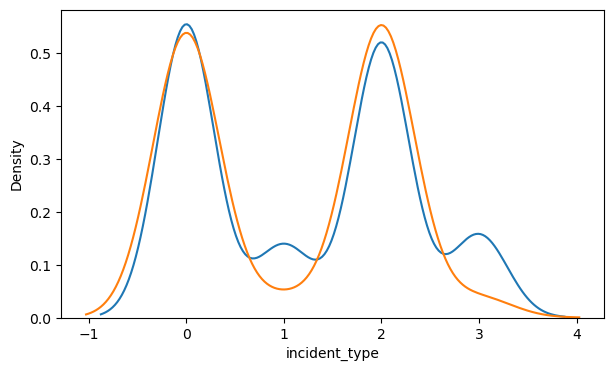

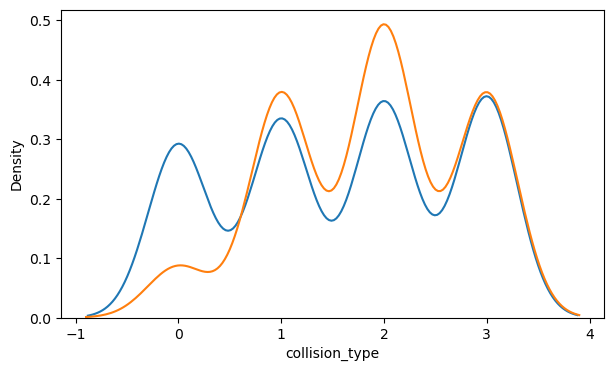

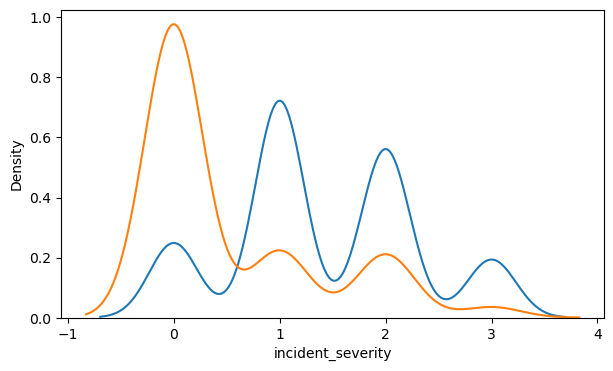

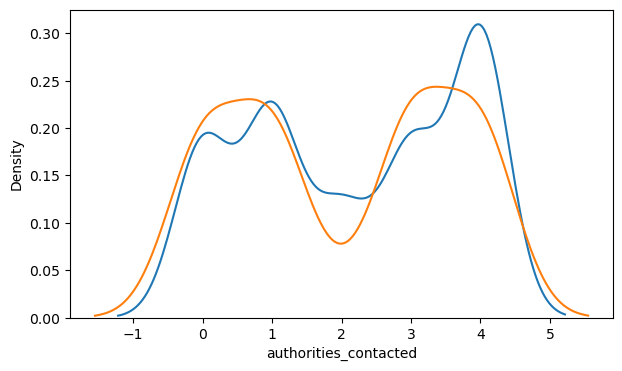

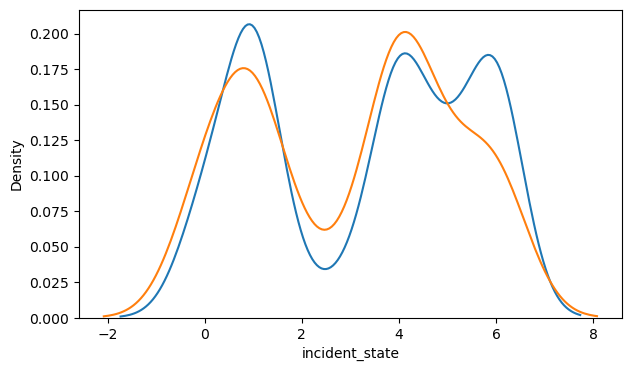

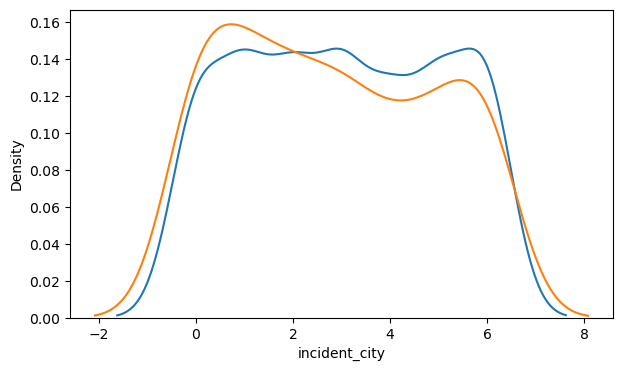

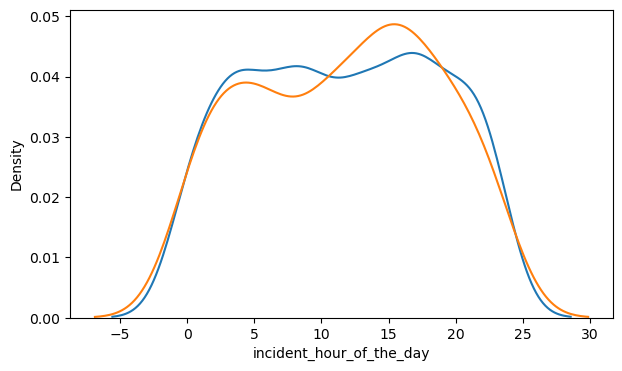

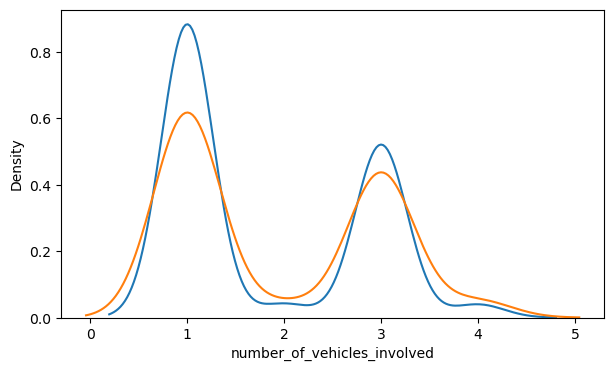

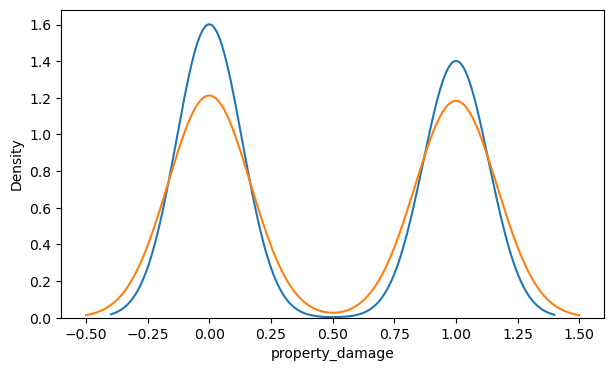

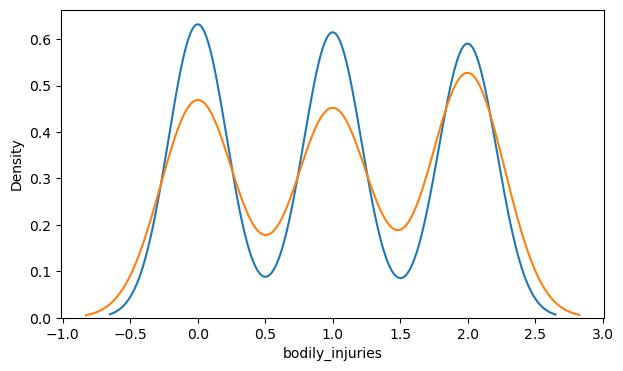

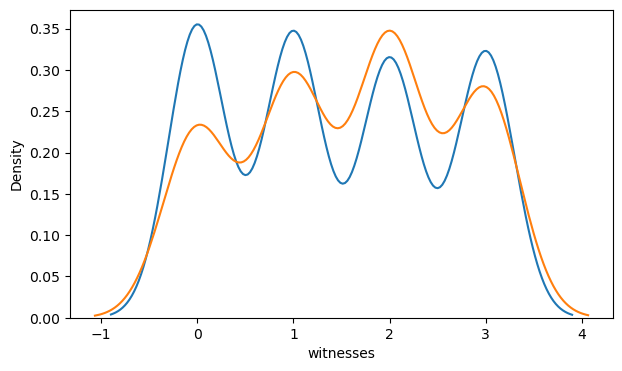

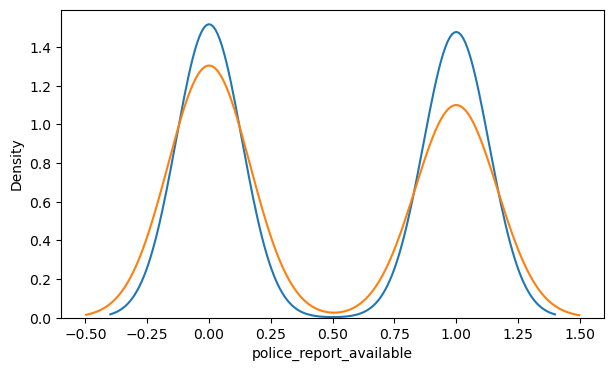

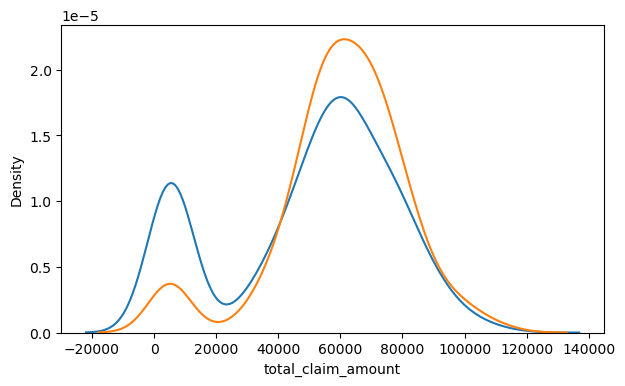

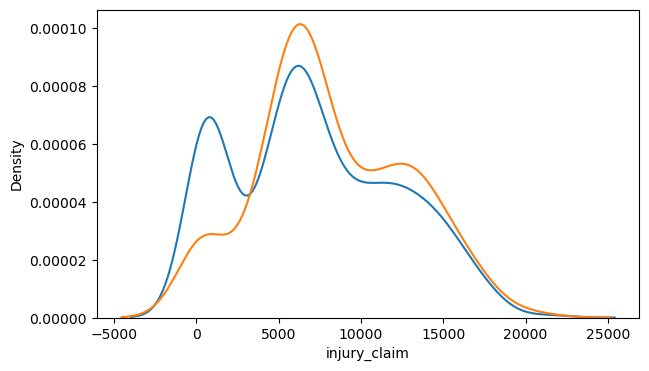

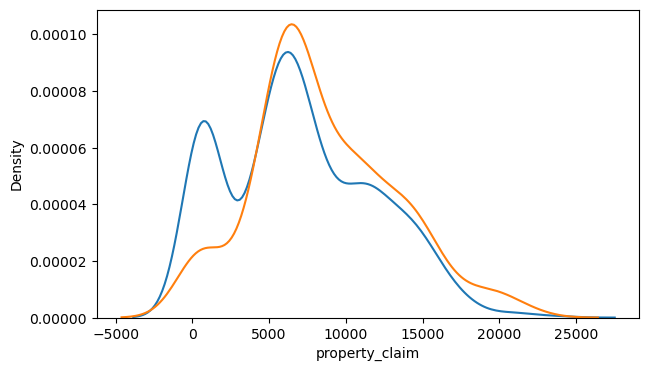

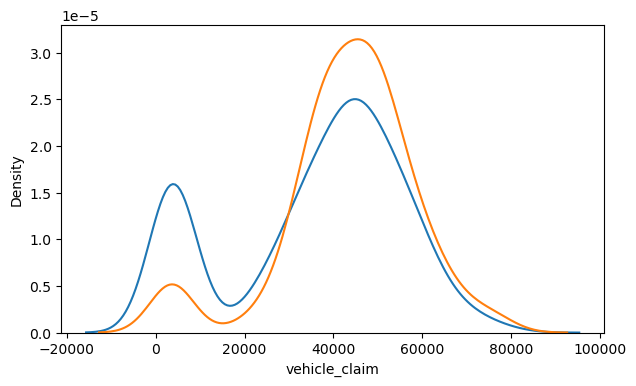

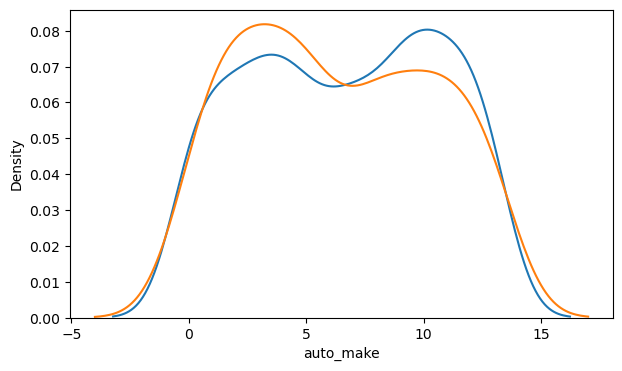

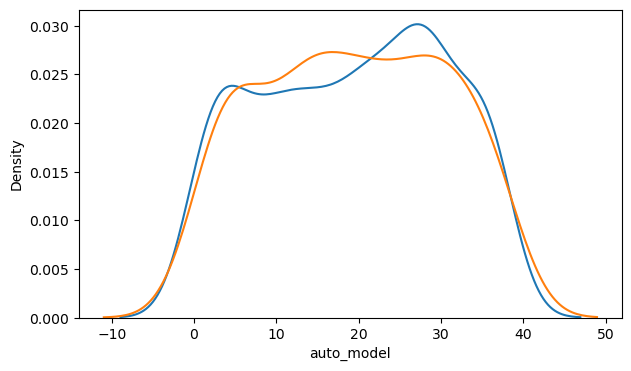

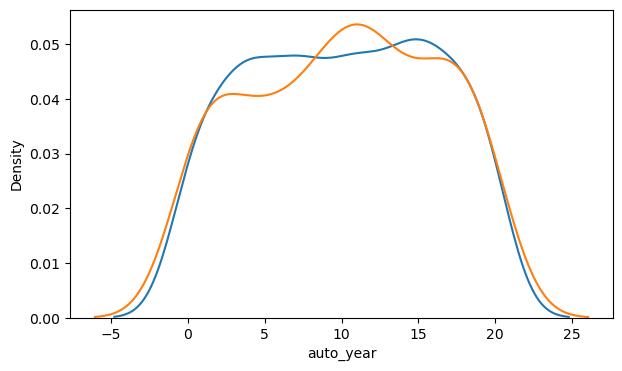

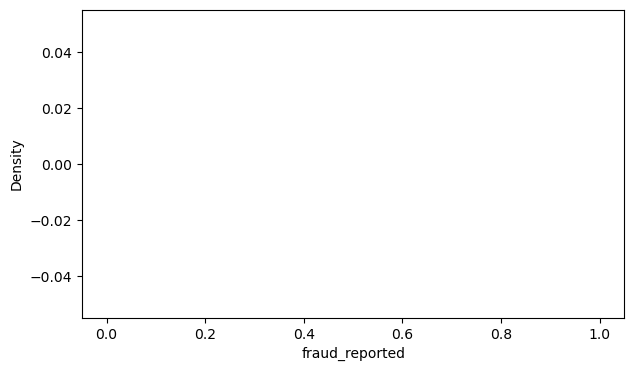

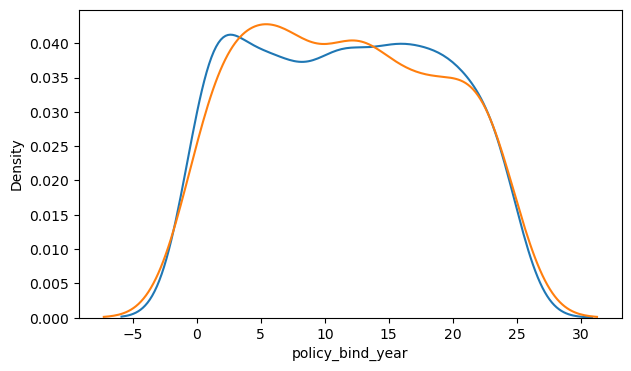

In [142]:
for i in df2.columns:
    plt.figure(figsize=(7,4))
    sns.distplot(fraud_0[i],hist=False,rug=False)
    sns.distplot(fraud_1[i],hist=False,rug=False)
    plt.show()
    print('\n')

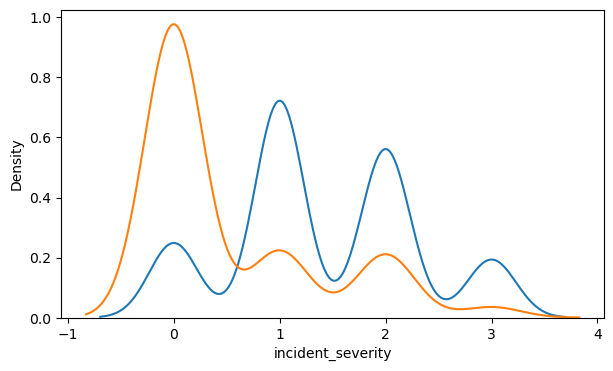

In [143]:
plt.figure(figsize=(7,4))
sns.distplot(fraud_0['incident_severity'],hist=False,rug=False)
sns.distplot(fraud_1['incident_severity'],hist=False,rug=False)
plt.show()

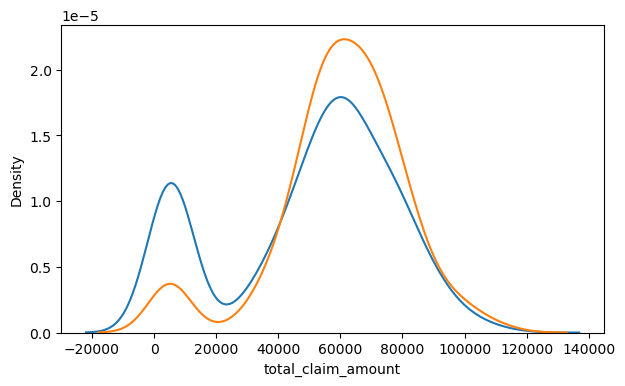

In [144]:
plt.figure(figsize=(7,4))
sns.distplot(fraud_0['total_claim_amount'],hist=False,rug=False)
sns.distplot(fraud_1['total_claim_amount'],hist=False,rug=False)
plt.show()

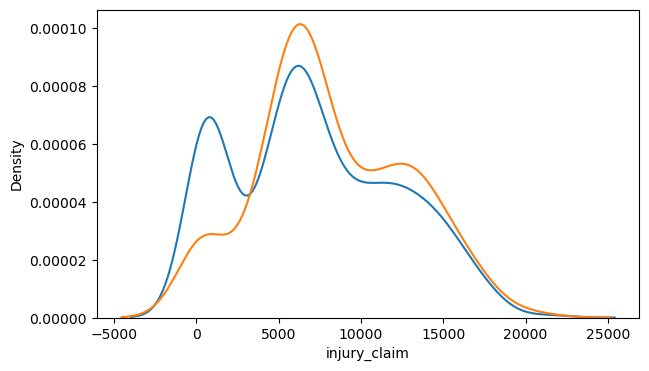

In [145]:
plt.figure(figsize=(7,4))
sns.distplot(fraud_0['injury_claim'],hist=False,rug=False)
sns.distplot(fraud_1['injury_claim'],hist=False,rug=False)
plt.show()

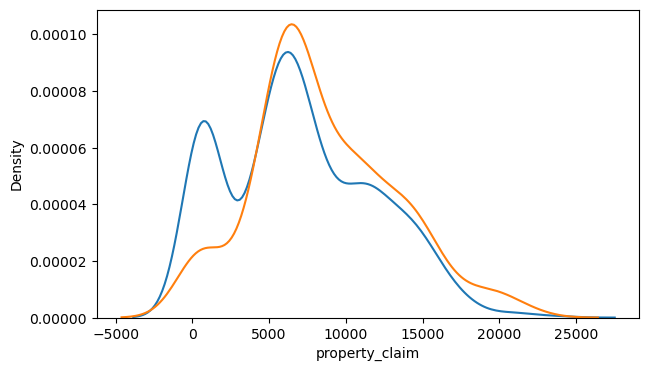

In [146]:
plt.figure(figsize=(7,4))
sns.distplot(fraud_0['property_claim'],hist=False,rug=False)
sns.distplot(fraud_1['property_claim'],hist=False,rug=False)
plt.show()

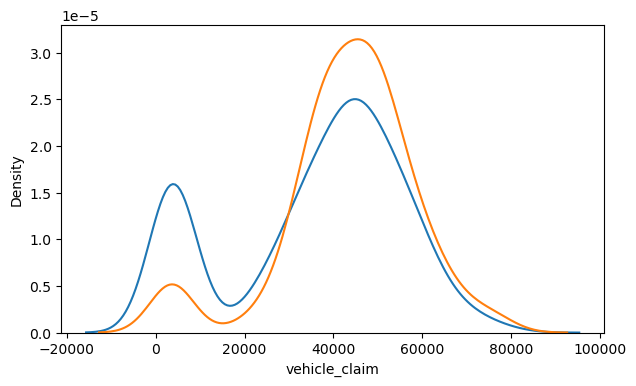

In [147]:
 plt.figure(figsize=(7,4))
sns.distplot(fraud_0['vehicle_claim'],hist=False,rug=False)
sns.distplot(fraud_1['vehicle_claim'],hist=False,rug=False)
plt.show()

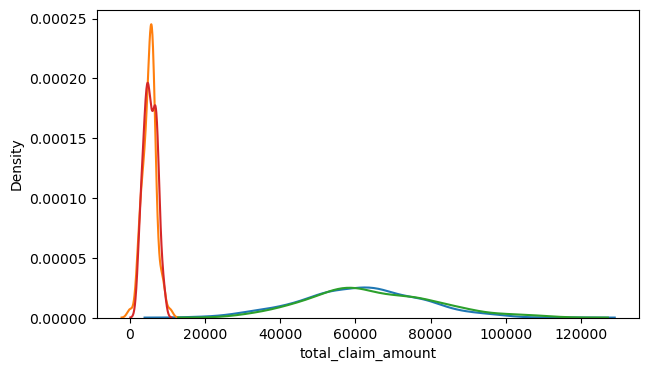

In [148]:
incident_type=df2.groupby('incident_type')
incident_type_0=incident_type.get_group(0)
incident_type_1=incident_type.get_group(1)
incident_type_2=incident_type.get_group(2)
incident_type_3=incident_type.get_group(3)
plt.figure(figsize=(7,4))
sns.distplot(incident_type_0['total_claim_amount'],hist=False,rug=False)
sns.distplot(incident_type_1['total_claim_amount'],hist=False,rug=False)
sns.distplot(incident_type_2['total_claim_amount'],hist=False,rug=False)
sns.distplot(incident_type_3['total_claim_amount'],hist=False,rug=False)
plt.show()

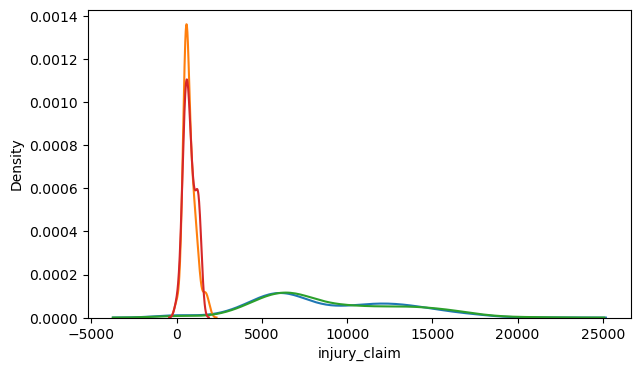

In [149]:
incident_type=df2.groupby('incident_type')
incident_type_0=incident_type.get_group(0)
incident_type_1=incident_type.get_group(1)
incident_type_2=incident_type.get_group(2)
incident_type_3=incident_type.get_group(3)
plt.figure(figsize=(7,4))
sns.distplot(incident_type_0['injury_claim'],hist=False,rug=False)
sns.distplot(incident_type_1['injury_claim'],hist=False,rug=False)
sns.distplot(incident_type_2['injury_claim'],hist=False,rug=False)
sns.distplot(incident_type_3['injury_claim'],hist=False,rug=False)
plt.show()

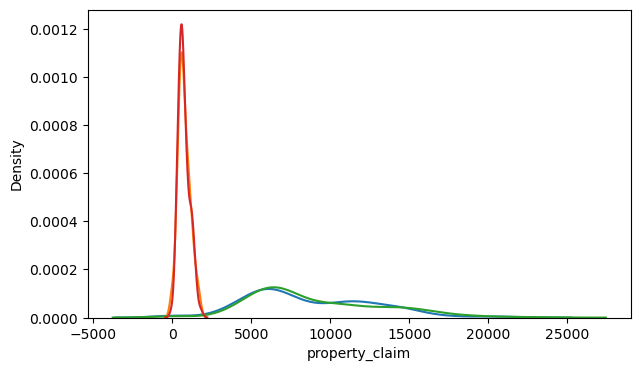

In [150]:
incident_type=df2.groupby('incident_type')
incident_type_0=incident_type.get_group(0)
incident_type_1=incident_type.get_group(1)
incident_type_2=incident_type.get_group(2)
incident_type_3=incident_type.get_group(3)
plt.figure(figsize=(7,4))
sns.distplot(incident_type_0['property_claim'],hist=False,rug=False)
sns.distplot(incident_type_1['property_claim'],hist=False,rug=False)
sns.distplot(incident_type_2['property_claim'],hist=False,rug=False)
sns.distplot(incident_type_3['property_claim'],hist=False,rug=False)
plt.show()

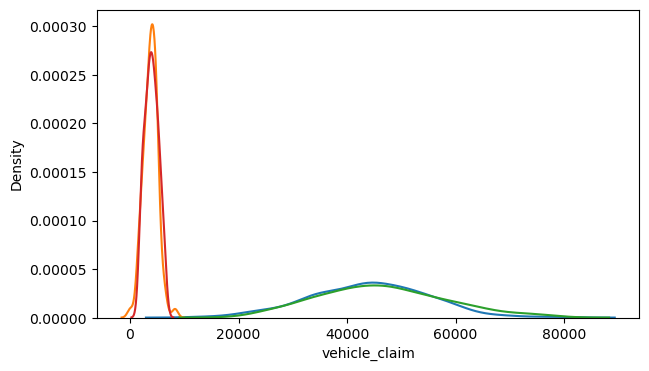

In [151]:
incident_type=df2.groupby('incident_type')
incident_type_0=incident_type.get_group(0)
incident_type_1=incident_type.get_group(1)
incident_type_2=incident_type.get_group(2)
incident_type_3=incident_type.get_group(3)
plt.figure(figsize=(7,4))
sns.distplot(incident_type_0['vehicle_claim'],hist=False,rug=False)
sns.distplot(incident_type_1['vehicle_claim'],hist=False,rug=False)
sns.distplot(incident_type_2['vehicle_claim'],hist=False,rug=False)
sns.distplot(incident_type_3['vehicle_claim'],hist=False,rug=False)
plt.show()

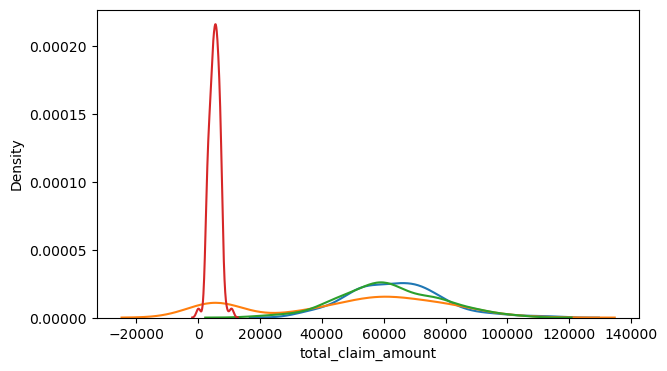

In [152]:
incident_severity=df2.groupby('incident_severity')
incident_severity_0=incident_severity.get_group(0)
incident_severity_1=incident_severity.get_group(1)
incident_severity_2=incident_severity.get_group(2)
incident_severity_3=incident_severity.get_group(3)
plt.figure(figsize=(7,4))
sns.distplot(incident_severity_0['total_claim_amount'],hist=False,rug=False)
sns.distplot(incident_severity_1['total_claim_amount'],hist=False,rug=False)
sns.distplot(incident_severity_2['total_claim_amount'],hist=False,rug=False)
sns.distplot(incident_severity_3['total_claim_amount'],hist=False,rug=False)
plt.show()


Observations:

1.The trival damage has total claim amount ranging from 0 to 2000.
2.Major damage,Minor damage,total loss has a total claim amount ranging from 20000 to 120000

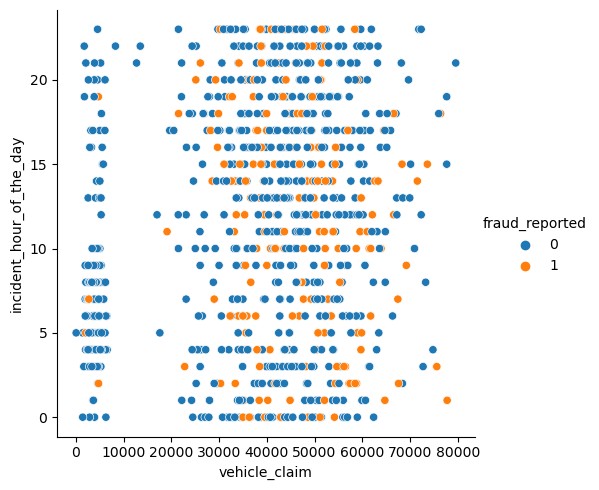

In [153]:
sns.relplot(y='incident_hour_of_the_day',x='vehicle_claim',data=df2,hue='fraud_reported')

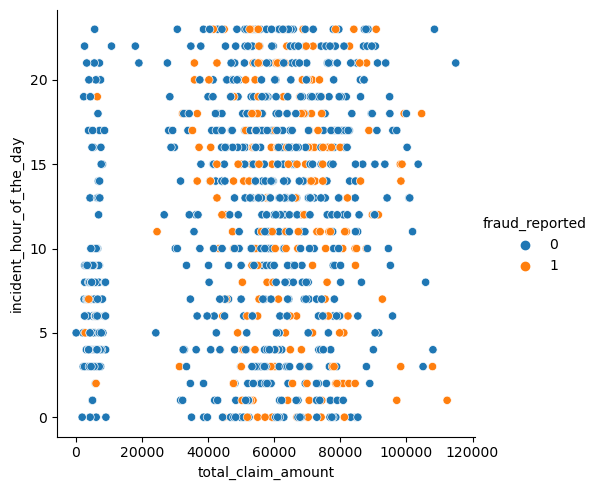

In [154]:
sns.relplot(y='incident_hour_of_the_day',x='total_claim_amount',data=df2,hue='fraud_reported')

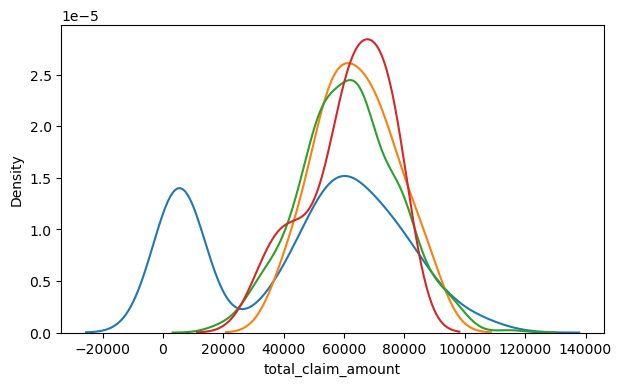

In [155]:
number_of_vehicles_involved=df2.groupby('number_of_vehicles_involved')
number_of_vehicles_involved_1=number_of_vehicles_involved.get_group(1)
number_of_vehicles_involved_2=number_of_vehicles_involved.get_group(2)
number_of_vehicles_involved_3=number_of_vehicles_involved.get_group(3)
number_of_vehicles_involved_4=number_of_vehicles_involved.get_group(4)
plt.figure(figsize=(7,4))
sns.distplot(number_of_vehicles_involved_1['total_claim_amount'],hist=False,rug=False)
sns.distplot(number_of_vehicles_involved_2['total_claim_amount'],hist=False,rug=False)
sns.distplot(number_of_vehicles_involved_3['total_claim_amount'],hist=False,rug=False)
sns.distplot(number_of_vehicles_involved_4['total_claim_amount'],hist=False,rug=False)
plt.show()

In [156]:
df2.isnull().sum()

months_as_customer             0
age                            0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_cl

In [157]:
k=df2.applymap(np.isreal)

In [158]:
for col in k:
    print(col)
    print(k[col].value_counts())
    print('\n')

months_as_customer
True    997
Name: months_as_customer, dtype: int64


age
True    997
Name: age, dtype: int64


policy_state
True    997
Name: policy_state, dtype: int64


policy_csl
True    997
Name: policy_csl, dtype: int64


policy_deductable
True    997
Name: policy_deductable, dtype: int64


policy_annual_premium
True    997
Name: policy_annual_premium, dtype: int64


umbrella_limit
True    997
Name: umbrella_limit, dtype: int64


insured_zip
True    997
Name: insured_zip, dtype: int64


insured_sex
True    997
Name: insured_sex, dtype: int64


insured_education_level
True    997
Name: insured_education_level, dtype: int64


insured_occupation
True    997
Name: insured_occupation, dtype: int64


insured_hobbies
True    997
Name: insured_hobbies, dtype: int64


insured_relationship
True    997
Name: insured_relationship, dtype: int64


capital-gains
True    997
Name: capital-gains, dtype: int64


capital-loss
True    997
Name: capital-loss, dtype: int64


incident_type
True    99

In [159]:
from scipy.stats import zscore
z=np.abs(zscore(df2))
threshold=3
df3=df2[(z<3).all(axis=1)]
print('percentage of loss of data by zscore is :',(df2.shape[0]-df3.shape[0])/df2.shape[0])

percentage of loss of data by zscore is : 0.01905717151454363


In [160]:
x=df3.drop('fraud_reported',axis=1)
y=df3['fraud_reported']

In [161]:
x.skew()

months_as_customer             0.358407
age                            0.468369
policy_state                  -0.036285
policy_csl                     0.100336
policy_deductable              0.057425
policy_annual_premium          0.040128
umbrella_limit                 1.904091
insured_zip                    0.839253
insured_sex                    0.139611
insured_education_level        0.006148
insured_occupation            -0.058133
insured_hobbies               -0.061824
insured_relationship           0.075541
capital-gains                  0.463520
capital-loss                  -0.385387
incident_type                  0.091942
collision_type                -0.194053
incident_severity              0.275720
authorities_contacted         -0.107329
incident_state                -0.149344
incident_city                  0.038224
incident_hour_of_the_day      -0.043797
number_of_vehicles_involved    0.506349
property_damage                0.098429
bodily_injuries                0.000000


In [163]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x_over,y_over=SM.fit_resample(x,y)
x_smote,y_smote=SM.fit_resample(x,y)

In [164]:
lg=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.27,random_state=45)
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy score through logistic regression is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through logistic regression is 
0.526
classification report is
              precision    recall  f1-score   support

           0       0.58      0.43      0.49       214
           1       0.49      0.64      0.56       185

    accuracy                           0.53       399
   macro avg       0.54      0.53      0.52       399
weighted avg       0.54      0.53      0.52       399

confusion matrix is
[[ 91 123]
 [ 66 119]]




In [165]:
lg=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.27,random_state=45)
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy score through logistic regression is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through logistic regression is 
0.564
classification report is
              precision    recall  f1-score   support

           0       0.64      0.43      0.52       214
           1       0.52      0.71      0.60       185

    accuracy                           0.56       399
   macro avg       0.58      0.57      0.56       399
weighted avg       0.58      0.56      0.56       399

confusion matrix is
[[ 93 121]
 [ 53 132]]




Observations:

1.We can see that out of three set of models (x,y),(x_over,y_over),(x_smote,y_smote), eventhough the x,y model has highest accuracy but it has f1 score of 1 as 0,so the best inputs are x_smote,y_smote

In [166]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
xs=scale.fit_transform(x_smote)

In [168]:
x_train,x_test,y_train,y_test=train_test_split(xs,y_smote,test_size=0.27,random_state=45)
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy score through logistic regression is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')


accuracy score through logistic regression is 
0.789
classification report is
              precision    recall  f1-score   support

           0       0.85      0.74      0.79       214
           1       0.74      0.85      0.79       185

    accuracy                           0.79       399
   macro avg       0.79      0.79      0.79       399
weighted avg       0.80      0.79      0.79       399

confusion matrix is
[[158  56]
 [ 28 157]]




In [169]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
add=AdaBoostClassifier()
rf=RandomForestClassifier()

In [170]:
#Finding the best random state
#Finding the maximum accuracy
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(xs,y_smote,test_size=0.27,random_state=i)
    mod=lg
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('the best accuracy is ',maxAccu,'on random state',maxRS)

the best accuracy is  0.8446115288220551 on random state 108


In [171]:
x_train,x_test,y_train,y_test=train_test_split(xs,y_smote,test_size=0.27,random_state=86)

In [172]:
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy score through logistic regression is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through logistic regression is 
0.832
classification report is
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       204
           1       0.82      0.84      0.83       195

    accuracy                           0.83       399
   macro avg       0.83      0.83      0.83       399
weighted avg       0.83      0.83      0.83       399

confusion matrix is
[[169  35]
 [ 32 163]]




In [173]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
pred=gnb.predict(x_test)
print('accuracy score through GaussianNB is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through GaussianNB is 
0.805
classification report is
              precision    recall  f1-score   support

           0       0.85      0.75      0.80       204
           1       0.77      0.86      0.81       195

    accuracy                           0.80       399
   macro avg       0.81      0.81      0.80       399
weighted avg       0.81      0.80      0.80       399

confusion matrix is
[[153  51]
 [ 27 168]]




In [174]:
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print('accuracy score through svc is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through svc is 
0.867
classification report is
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       204
           1       0.88      0.85      0.86       195

    accuracy                           0.87       399
   macro avg       0.87      0.87      0.87       399
weighted avg       0.87      0.87      0.87       399

confusion matrix is
[[181  23]
 [ 30 165]]




In [175]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
print('accuracy score through Decisiob Tree Classifier is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through Decisiob Tree Classifier is 
0.815
classification report is
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       204
           1       0.78      0.86      0.82       195

    accuracy                           0.81       399
   macro avg       0.82      0.82      0.81       399
weighted avg       0.82      0.81      0.81       399

confusion matrix is
[[157  47]
 [ 27 168]]




In [176]:
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print('accuracy score through knn is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through knn is 
0.714
classification report is
              precision    recall  f1-score   support

           0       0.94      0.47      0.63       204
           1       0.64      0.97      0.77       195

    accuracy                           0.71       399
   macro avg       0.79      0.72      0.70       399
weighted avg       0.79      0.71      0.70       399

confusion matrix is
[[ 96 108]
 [  6 189]]




In [177]:
add.fit(x_train,y_train)
pred=add.predict(x_test)
print('accuracy score through Adaboost is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through Adaboost is 
0.88
classification report is
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       204
           1       0.89      0.86      0.87       195

    accuracy                           0.88       399
   macro avg       0.88      0.88      0.88       399
weighted avg       0.88      0.88      0.88       399

confusion matrix is
[[184  20]
 [ 28 167]]




In [178]:
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('accuracy score through random forest is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through random forest is 
0.895
classification report is
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       204
           1       0.91      0.87      0.89       195

    accuracy                           0.89       399
   macro avg       0.90      0.89      0.89       399
weighted avg       0.90      0.89      0.89       399

confusion matrix is
[[188  16]
 [ 26 169]]




In [179]:
models=[lg,gnb,svc,dtc,knn,add,rf]
for m in models:
    score=cross_val_score(m,xs,y_smote,cv=5)
    print(m,'score is:')
    print(round((score.mean()),3))
    print('\n')

LogisticRegression() score is:
0.782


GaussianNB() score is:
0.747


SVC() score is:
0.825


DecisionTreeClassifier() score is:
0.808


KNeighborsClassifier() score is:
0.712


AdaBoostClassifier() score is:
0.816


RandomForestClassifier() score is:
0.875




# Hyper parameter tuning

In [180]:
grid_param={
    'n_estimators':[10,50,100],
    'criterion':['gini','entropy'],
    'max_features':['auto','sqrt','log2'],
    'bootstrap':[True,False],
    'oob_score':[True,False],
    'class_weight':['balanced_subsample','balanced']
    
}

gd_sr=GridSearchCV(estimator=rf,
                  param_grid=grid_param,
                  scoring='accuracy',
                  cv=5)

gd_sr.fit(xs,y_smote)

best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'bootstrap': False, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 100, 'oob_score': False}
0.8754351809436555


In [181]:
rf1=RandomForestClassifier(n_estimators=50,criterion='entropy',max_features='sqrt',bootstrap=False,oob_score=False,class_weight='balanced_subsample')
rf1.fit(x_train,y_train)
pred=rf1.predict(x_test)
print('accuracy score through random forest is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through random forest is 
0.892
classification report is
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       204
           1       0.90      0.87      0.89       195

    accuracy                           0.89       399
   macro avg       0.89      0.89      0.89       399
weighted avg       0.89      0.89      0.89       399

confusion matrix is
[[186  18]
 [ 25 170]]




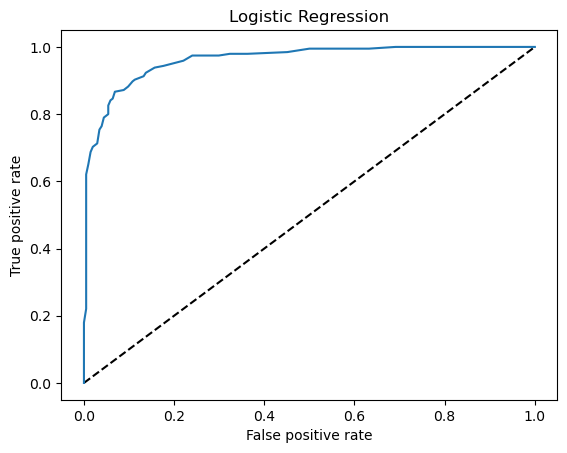

0.8917797888386123

In [182]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=rf1.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()
auc_score=roc_auc_score(y_test,rf1.predict(x_test))
auc_score

In [183]:
import joblib
joblib.dump(rf1,'Insuranceclaim.obj')

['Insuranceclaim.obj']